In [9]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from darts import TimeSeries
from darts.metrics import mae, mse, rmse

# # For local notebook
# src_folder = os.path.abspath(os.path.join(os.pardir, "src"))
# sys.path.append(src_folder)

# from metrics import compare_series_metrics

# from custom_plots import (
#     aggregate_median_metrics,
#     plot_bar_for_medians_by_target,
#     plot_boxplots_for_metrics_by_target,
#     process_results_parquet,
# )

## Estilo dos gráficos

In [10]:
plt.rcParams["figure.figsize"] = [20, 8]

In [11]:
sns.set_palette("Paired")

## Lendo os resultados salvos em parquet

In [12]:
data_path = os.path.join(os.pardir, "data")

In [13]:
os.path.join(os.pardir, "data", "90_split", "no_window")

'../data/90_split/no_window'

Analisando apenas um resultado:

In [14]:
test_df = pd.read_parquet(os.path.join(os.pardir, "data", "results", "LinearRegressionModel_historical_forecast.parquet"))
test_df = test_df.reset_index(drop=True)
test_df

,Model,Series_id,Fit_elapsed_time,Historical_Forecast_elapsed_time,Actuals_index,Actuals_values,Preds_index,Preds_values
0,LinearRegressionModel,0,0.361317,105.027972,"[2020-02-27T20:08:18.000000000, 2020-02-27T20:...","[1.781, 0.002, 2.641, 2.739, 2.0045, 1.27, 3.2...","[2020-02-27T20:08:18.000000000, 2020-02-27T20:...","[10.736733755899406, 11.327747680707972, 12.99..."
1,LinearRegressionModel,1,0.361317,105.027972,"[2020-02-13T14:44:15.000000000, 2020-02-13T14:...","[7.794, 2.586, 1.8544999999999998, 1.123, 0.68...","[2020-02-13T14:44:15.000000000, 2020-02-13T14:...","[17.868539029755876, 17.76410198775188, 17.070..."
2,LinearRegressionModel,2,0.361317,105.027972,"[2019-12-16T14:10:37.000000000, 2019-12-16T14:...","[31.183, 59.41, 61.783, 64.156, 70.585, 58.742...","[2019-12-16T14:10:37.000000000, 2019-12-16T14:...","[44.841951065941835, 42.686319883062616, 42.49..."
3,LinearRegressionModel,3,0.361317,105.027972,"[2020-01-16T11:32:46.000000000, 2020-01-16T11:...","[21.045, 12.966, 0.002, 0.002, 24.433, 27.28, ...","[2020-01-16T11:32:46.000000000, 2020-01-16T11:...","[52.37695899958607, 47.65938967876973, 41.8182..."
4,LinearRegressionModel,4,0.361317,105.027972,"[2020-02-14T13:36:16.000000000, 2020-02-14T13:...","[0.163, 2.945, 18.635, 24.348, 139.961, 169.34...","[2020-02-14T13:36:16.000000000, 2020-02-14T13:...","[121.17038411184039, 121.77942826051581, 123.1..."
...,...,...,...,...,...,...,...,...
78,LinearRegressionModel,78,0.361317,105.027972,"[2019-12-03T10:55:04.000000000, 2019-12-03T10:...","[0.0, 1.794, 1.0385, 0.283, 0.0, 0.279, 0.694,...","[2019-12-03T10:55:04.000000000, 2019-12-03T10:...","[0.8863559539965581, 0.7574365873068265, 0.721..."
79,LinearRegressionModel,79,0.361317,105.027972,"[2019-11-22T07:48:41.000000000, 2019-11-22T07:...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2019-11-22T07:48:41.000000000, 2019-11-22T07:...","[0.6871039113583743, 0.679102339058785, 0.6876..."
80,LinearRegressionModel,80,0.361317,105.027972,"[2019-11-26T15:54:14.000000000, 2019-11-26T15:...","[0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[2019-11-26T15:54:14.000000000, 2019-11-26T15:...","[0.6332035954278422, 0.6019526913583425, 0.561..."
81,LinearRegressionModel,81,0.361317,105.027972,"[2019-11-23T14:03:27.000000000, 2019-11-23T14:...","[0.0, 0.0, 0.0, 0.002, 0.0, 0.002, 0.001, 0.0,...","[2019-11-23T14:03:27.000000000, 2019-11-23T14:...","[1.6073871489543725, 1.8293155612845446, 1.905..."


<Axes: xlabel='time'>

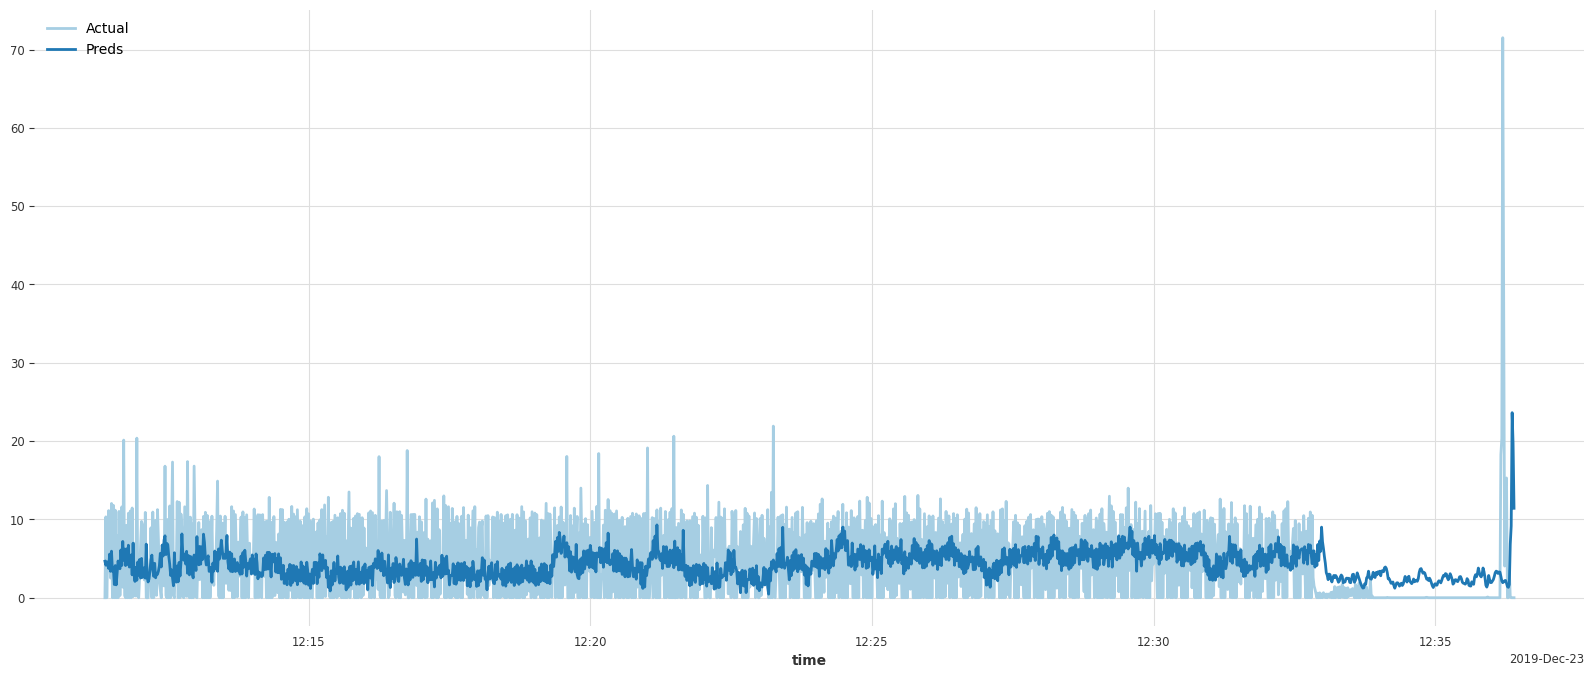

In [20]:
sample_idx = 6
dates_1 = pd.DatetimeIndex(test_df["Actuals_index"][sample_idx])
values_1 = test_df["Actuals_values"][sample_idx]
actual_ts = TimeSeries.from_times_and_values(dates_1, values_1)


dates_2 = pd.DatetimeIndex(test_df["Preds_index"][sample_idx])
values_2 = test_df["Preds_values"][sample_idx]
preds_ts = TimeSeries.from_times_and_values(dates_2, values_2)

actual_ts.plot(label="Actual")
preds_ts.plot(label="Preds")

In [36]:
file_path = os.path.join(split_90_path, "LSTM_driving_down_RSRP.parquet")
# Read the Parquet file and add it to the DataFrame
test_df = pd.read_parquet(file_path)
test_df = test_df.reset_index(drop=True)

In [37]:
test_df

,target,Activity,Model,Elapsed_time,Train_index,Train_values,Actuals_index,Actuals_values,Preds_index,Preds_values
0,RSRP,driving_down,LSTM,7.522307,"[2020-02-14T09:38:22.000000000, 2020-02-14T09:...","[-89.0, -88.66666666666667, -88.33333333333333...","[2020-02-14T09:41:14.000000000, 2020-02-14T09:...","[-88.0, -88.0, -88.0, -88.0, -88.0, -89.0, -89...","[2020-02-14T09:41:14.000000000, 2020-02-14T09:...","[-87.8847214524254, -87.47991797208701, -87.43..."
1,RSRP,driving_down,LSTM,7.697968,"[2020-01-16T07:26:43.000000000, 2020-01-16T07:...","[-104.0, -104.0, -104.0, -104.0, -104.0, -102....","[2020-01-16T07:30:12.000000000, 2020-01-16T07:...","[-96.0, -96.0, -92.0, -85.0, -85.0, -85.0, -82...","[2020-01-16T07:30:12.000000000, 2020-01-16T07:...","[-94.59927091751159, -91.4363140333375, -91.73..."
2,RSRP,driving_down,LSTM,9.865479,"[2020-02-14T07:29:00.000000000, 2020-02-14T07:...","[-90.0, -90.0, -89.0, -88.0, -88.0, -88.0, -89...","[2020-02-14T07:32:48.000000000, 2020-02-14T07:...","[-88.0, -86.0, -86.0, -86.0, -89.0, -89.0, -87...","[2020-02-14T07:32:48.000000000, 2020-02-14T07:...","[-91.79939407206274, -91.43938165858688, -86.7..."
3,RSRP,driving_down,LSTM,5.086576,"[2019-12-16T12:27:05.000000000, 2019-12-16T12:...","[-100.0, -100.0, -99.0, -99.0, -100.0, -100.0,...","[2019-12-16T12:29:21.000000000, 2019-12-16T12:...","[-93.0, -96.0, -96.0, -96.0, -96.0, -96.0, -95...","[2019-12-16T12:29:21.000000000, 2019-12-16T12:...","[-91.34790230182757, -92.53163120380678, -90.5..."
4,RSRP,driving_down,LSTM,10.150481,"[2020-02-13T13:03:24.000000000, 2020-02-13T13:...","[-100.0, -100.0, -99.0, -99.0, -98.0, -98.0, -...","[2020-02-13T13:07:51.000000000, 2020-02-13T13:...","[-81.0, -84.0, -84.0, -78.0, -78.0, -79.0, -79...","[2020-02-13T13:07:51.000000000, 2020-02-13T13:...","[-81.14368926354837, -82.44711667459774, -83.3..."
5,RSRP,driving_down,LSTM,2.627012,"[2020-02-27T20:35:57.000000000, 2020-02-27T20:...","[-101.0, -102.0, -102.0, -101.0, -101.0, -100....","[2020-02-27T20:37:22.000000000, 2020-02-27T20:...","[-85.0, -90.0, -91.0, -92.0, -93.0, -93.0, -92...","[2020-02-27T20:37:22.000000000, 2020-02-27T20:...","[-88.38508326598252, -91.52935939995834, -92.4..."
6,RSRP,driving_down,LSTM,12.362610,"[2019-12-16T14:23:32.000000000, 2019-12-16T14:...","[-92.0, -93.0, -95.0, -95.0, -95.0, -95.0, -93...","[2019-12-16T14:28:27.000000000, 2019-12-16T14:...","[-78.0, -78.0, -77.0, -77.0, -76.0, -76.0, -75...","[2019-12-16T14:28:27.000000000, 2019-12-16T14:...","[-78.7060708484753, -78.91945590732865, -78.74..."
7,RSRP,driving_down,LSTM,7.511752,"[2020-01-16T09:56:56.000000000, 2020-01-16T09:...","[-99.0, -99.0, -99.0, -99.0, -99.0, -98.5, -98...","[2020-01-16T09:59:59.000000000, 2020-01-16T10:...","[-90.0, -92.0, -92.0, -88.0, -88.0, -85.0, -82...","[2020-01-16T09:59:59.000000000, 2020-01-16T10:...","[-88.18271150135318, -87.17120335701064, -86.5..."
8,RSRP,driving_down,LSTM,9.939963,"[2019-12-16T07:22:43.000000000, 2019-12-16T07:...","[-98.0, -99.0, -99.0, -99.0, -99.0, -101.0, -1...","[2019-12-16T07:27:03.000000000, 2019-12-16T07:...","[-90.0, -90.0, -87.0, -87.0, -94.0, -94.0, -94...","[2019-12-16T07:27:03.000000000, 2019-12-16T07:...","[-88.26613182414384, -88.71927284677155, -88.3..."
9,RSRP,driving_down,LSTM,2.616724,"[2020-02-27T17:30:15.000000000, 2020-02-27T17:...","[-99.0, -99.0, -99.0, -99.0, -99.0, -98.0, -98...","[2020-02-27T17:31:44.000000000, 2020-02-27T17:...","[-92.5, -89.0, -89.0, -91.0, -91.0, -95.5, -10...","[2020-02-27T17:31:44.000000000, 2020-02-27T17:...","[-96.09350758945496, -95.5570688485264, -93.13..."


In [38]:
sample_idx = 0

<Axes: xlabel='time'>

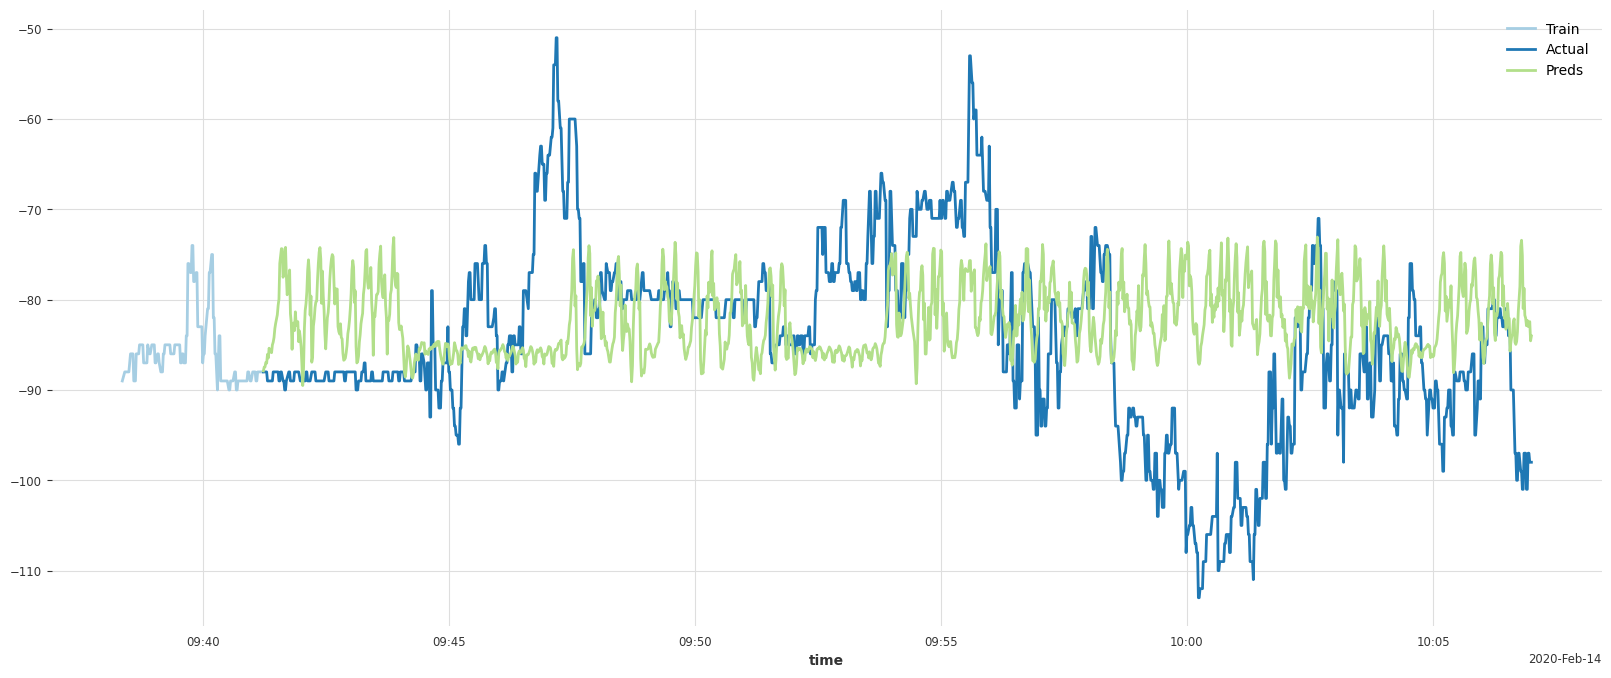

In [39]:
dates_0 = pd.DatetimeIndex(test_df["Train_index"][sample_idx])
values_0 = test_df["Train_values"][sample_idx]
train_ts = TimeSeries.from_times_and_values(dates_0, values_0)


dates_1 = pd.DatetimeIndex(test_df["Actuals_index"][sample_idx])
values_1 = test_df["Actuals_values"][sample_idx]
actual_ts = TimeSeries.from_times_and_values(dates_1, values_1)


dates_2 = pd.DatetimeIndex(test_df["Preds_index"][sample_idx])
values_2 = test_df["Preds_values"][sample_idx]
preds_ts = TimeSeries.from_times_and_values(dates_2, values_2)

train_ts.plot(label="Train")
actual_ts.plot(label="Actual")
preds_ts.plot(label="Preds")

In [34]:
print(f"treino: {len(train_ts)}")
print(f"test: {len(actual_ts)}")
print(f"representação: {(len(actual_ts) / len(train_ts)) * 100}")

treino: 378
test: 3399
representação: 899.2063492063492


Calculando todas as métricas do estudo para um resultado salvo:

In [35]:
compare_series_metrics(test_df)

,target,Activity,Model,Elapsed_time,Train_index,Train_values,Actuals_index,Actuals_values,Preds_index,Preds_values,MAE,RMSE,MSE,NRMSE,NMSE
0,RSRP,driving_down,FFT,0.018215,"[2020-02-13T15:02:01.000000000, 2020-02-13T15:...","[-93.0, -94.0, -94.0, -95.0, -96.0000000000000...","[2020-02-13T15:08:19.000000000, 2020-02-13T15:...","[-93.0, -93.0, -93.5, -94.0, -94.0, -92.0, -92...","[2020-02-13T15:08:19.000000000, 2020-02-13T15:...","[-90.72236836626564, -90.32146793210292, -89.9...",13.174633,15.821975,250.334901,0.251142,1.201916
1,RSRP,driving_down,FFT,0.013804,"[2020-02-14T09:38:22.000000000, 2020-02-14T09:...","[-89.0, -88.66666666666667, -88.33333333333333...","[2020-02-14T09:41:14.000000000, 2020-02-14T09:...","[-88.0, -88.0, -88.0, -88.0, -88.0, -89.0, -89...","[2020-02-14T09:41:14.000000000, 2020-02-14T09:...","[-87.08901223107677, -87.0207813196249, -86.96...",8.411582,10.879900,118.372234,0.175482,1.134863
2,RSRP,driving_down,FFT,0.014887,"[2020-02-14T07:29:00.000000000, 2020-02-14T07:...","[-90.0, -90.0, -89.0, -88.0, -88.0, -88.0, -89...","[2020-02-14T07:32:48.000000000, 2020-02-14T07:...","[-88.0, -86.0, -86.0, -86.0, -89.0, -89.0, -87...","[2020-02-14T07:32:48.000000000, 2020-02-14T07:...","[-88.23790236561312, -88.36308770385368, -88.4...",12.548129,15.218387,231.599293,0.237787,1.424475
3,RSRP,driving_down,FFT,0.013182,"[2019-12-16T12:27:05.000000000, 2019-12-16T12:...","[-100.0, -100.0, -99.0, -99.0, -100.0, -100.0,...","[2019-12-16T12:29:21.000000000, 2019-12-16T12:...","[-93.0, -96.0, -96.0, -96.0, -96.0, -96.0, -95...","[2019-12-16T12:29:21.000000000, 2019-12-16T12:...","[-94.66826781501219, -95.65156317771222, -96.6...",14.192315,17.085436,291.912132,0.316397,1.910603
4,RSRP,driving_down,FFT,0.012406,"[2020-02-14T12:58:17.000000000, 2020-02-14T12:...","[-98.0, -99.0, -99.0, -99.0, -99.0, -99.0, -10...","[2020-02-14T12:59:57.000000000, 2020-02-14T12:...","[-110.0, -110.0, -110.0, -113.0, -113.0, -113....","[2020-02-14T12:59:57.000000000, 2020-02-14T12:...","[-104.20617546070483, -101.38047730144876, -98...",23.190249,27.781318,771.801642,0.420929,2.132981
5,RSRP,driving_down,FFT,0.014122,"[2020-01-16T09:56:56.000000000, 2020-01-16T09:...","[-99.0, -99.0, -99.0, -99.0, -99.0, -98.5, -98...","[2020-01-16T09:59:59.000000000, 2020-01-16T10:...","[-90.0, -92.0, -92.0, -88.0, -88.0, -85.0, -82...","[2020-01-16T09:59:59.000000000, 2020-01-16T10:...","[-95.3299521765563, -95.42103094704669, -95.38...",13.663092,16.166212,261.346416,0.274004,1.968764
6,RSRP,driving_down,FFT,0.012133,"[2020-02-27T20:35:57.000000000, 2020-02-27T20:...","[-101.0, -102.0, -102.0, -101.0, -101.0, -100....","[2020-02-27T20:37:22.000000000, 2020-02-27T20:...","[-85.0, -90.0, -91.0, -92.0, -93.0, -93.0, -92...","[2020-02-27T20:37:22.000000000, 2020-02-27T20:...","[-96.3980180201417, -98.27359081039067, -99.79...",17.811665,21.051922,443.183432,0.345113,2.453616
7,RSRP,driving_down,FFT,0.014400,"[2020-01-16T07:26:43.000000000, 2020-01-16T07:...","[-104.0, -104.0, -104.0, -104.0, -104.0, -102....","[2020-01-16T07:30:12.000000000, 2020-01-16T07:...","[-96.0, -96.0, -92.0, -85.0, -85.0, -85.0, -82...","[2020-01-16T07:30:12.000000000, 2020-01-16T07:...","[-94.82684416248968, -96.1415409200727, -97.43...",12.461224,16.908323,285.891399,0.260128,1.602000
8,RSRP,driving_down,FFT,0.016023,"[2019-12-16T14:23:32.000000000, 2019-12-16T14:...","[-92.0, -93.0, -95.0, -95.0, -95.0, -95.0, -93...","[2019-12-16T14:28:27.000000000, 2019-12-16T14:...","[-78.0, -78.0, -77.0, -77.0, -76.0, -76.0, -75...","[2019-12-16T14:28:27.000000000, 2019-12-16T14:...","[-85.98729575874147, -86.86328387405496, -87.7...",13.037372,15.945002,254.243093,0.279737,1.890703
9,RSRP,driving_down,FFT,0.015548,"[2020-02-13T13:03:24.000000000, 2020-02-13T13:...","[-100.0, -100.0, -99.0, -99.0, -98.0, -98.0, -...","[2020-02-13T13:07:51.000000000, 2020-02-13T13:...","[-81.0, -84.0, -84.0, -78.0, -78.0, -79.0, -79...","[2020-02-13T13:07:51.000000000, 2020-02-13T13:...","[-90.31122564030986, -

Lendo todos os resultados baselines:

In [117]:
dfs = []
folder = os.path.join(folder_path, "no_window")
for file in os.listdir(folder):
    if file.endswith(".parquet"):
        # Create the full path of the file
        file_path = os.path.join(folder, file)
        # Read the Parquet file and add it to the DataFrame
        mult_df = pd.read_parquet(file_path)
        dfs.append(mult_df)

all_baselines_results = pd.concat(dfs)

# Liberar memoria
del dfs

all_baselines_results = all_baselines_results.reset_index(drop=True)

In [118]:
all_baselines_results

,target,Activity,Model,Elapsed_time,Train_index,Train_values,Actuals_index,Actuals_values,Preds_index,Preds_values
0,CQI,driving_down,ARIMA,0.440737,"[2020-02-14T09:38:22.000000000, 2020-02-14T09:...","[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0...","[2020-02-14T10:06:51.000000000, 2020-02-14T10:...","[11.0, 11.0, 11.0, 14.0, 14.0, 8.0, 8.0, 12.0,...","[2020-02-14T10:06:51.000000000, 2020-02-14T10:...","[12.97640531961024, 12.959465515133722, 12.947..."
1,CQI,driving_down,ARIMA,0.585396,"[2020-02-14T07:29:00.000000000, 2020-02-14T07:...","[10.0, 10.0, 12.0, 14.0, 11.0, 11.0, 14.0, 14....","[2020-02-14T08:06:41.000000000, 2020-02-14T08:...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[2020-02-14T08:06:41.000000000, 2020-02-14T08:...","[8.00003049194532, 8.000051043240301, 8.000064..."
2,CQI,driving_down,ARIMA,0.454873,"[2020-01-16T07:26:43.000000000, 2020-01-16T07:...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 11.0,...","[2020-01-16T08:01:23.000000000, 2020-01-16T08:...","[6.0, 6.0, 7.5, 9.0, 9.0, 10.0, 10.0, 9.0, 9.0...","[2020-01-16T08:01:23.000000000, 2020-01-16T08:...","[6.654679520919993, 7.117009467532537, 7.44350..."
3,CQI,driving_down,ARIMA,0.373832,"[2020-01-16T12:10:03.000000000, 2020-01-16T12:...","[9.0, 9.0, 11.999999999999998, 11.0, 11.0, 11....","[2020-01-16T12:16:20.000000000, 2020-01-16T12:...","[4.0, 4.0, 10.0, 10.0, 14.0, 14.0, 14.0, 13.5,...","[2020-01-16T12:16:20.000000000, 2020-01-16T12:...","[13.412805153535253, 12.977760603431715, 12.65..."
4,CQI,driving_down,ARIMA,0.487376,"[2020-01-16T09:56:56.000000000, 2020-01-16T09:...","[11.0, 11.0, 13.0, 13.0, 13.0, 11.0, 9.0, 11.0...","[2020-01-16T10:27:11.000000000, 2020-01-16T10:...","[10.0, 10.0, 12.0, 12.0, 11.0, 11.0, 12.0, 10....","[2020-01-16T10:27:11.000000000, 2020-01-16T10:...","[9.999019729363246, 9.99828367099578, 9.997730..."
...,...,...,...,...,...,...,...,...,...,...
4766,SNR,static_strm,Theta,0.033813,"[2019-12-23T10:30:35.000000000, 2019-12-23T10:...","[0.9999999999999994, 0.9999999999999994, 0.0, ...","[2019-12-23T12:36:15.000000000, 2019-12-23T12:...","[-1.0, -1.0, 1.0, 1.0, 3.0, 3.0, 4.0, 4.0, -1....","[2019-12-23T12:36:15.000000000, 2019-12-23T12:...","[0.9999999999999994, 0.9999999999999994, 0.999..."
4767,SNR,static_strm,Theta,0.032202,"[2020-01-06T11:40:29.000000000, 2020-01-06T11:...","[-5.999999999999999, -0.49999999999999956, 5.0...","[2020-01-06T13:37:35.000000000, 2020-01-06T13:...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[2020-01-06T13:37:35.000000000, 2020-01-06T13:...","[3.9999999999999987, 3.9999999999999987, 3.999..."
4768,SNR,static_strm,Theta,0.017622,"[2019-12-19T15:00:47.000000000, 2019-12-19T15:...","[-4.0, -4.0, -2.0000000000000004, -2.000000000...","[2019-12-19T15:41:55.000000000, 2019-12-19T15:...","[0.0, 0.0, -1.0, -1.0, 0.0, 0.0, -3.0, -3.0, -...","[2019-12-19T15:41:55.000000000, 2019-12-19T15:...","[1.0000000149011603, 1.0000000149011603, 1.000..."
4769,SNR,static_strm,Theta,0.030446,"[2019-12-06T09:55:13.000000000, 2019-12-06T09:...","[3.999999999999999, 10.999999999999998, 1.9999...","[2019-12-06T11:43:37.000000000, 2019-12-06T11:...","[8.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, -2.0, -4.0...","[2019-12-06T11:43:37.000000000, 2019-12-06T11:...","[7.999999731777681, 7.999999731777681, 7.99999..."


### Processando métricas

In [17]:
# df = process_results_parquet(folder_path)

In [18]:
df_metrics = compare_series_metrics(all_baselines_results)

In [ ]:
df_metrics

In [ ]:
# Verifica se o arquivo já existe antes de salvar
metrics_path = os.path.join(os.pardir, "data", "last_metrics_univariate.parquet")
if not os.path.exists(metrics_path):
    try:
        os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
        df_metrics.to_parquet(metrics_path, compression="gzip")
        print(f"Arquivo salvo em: {metrics_path}")
    except Exception as e:
        print(f"Não foi possível salvar: {e}")
else:
    print("Arquivo já existe. Nenhuma ação necessária.")

In [4]:
# Lê o arquivo salvo e associa a df_metrics
metrics_path = os.path.join(os.pardir, "data", "last_metrics_univariate.parquet")
try:
    df_metrics = pd.read_parquet(metrics_path)
    print("Arquivo carregado com sucesso.")
except Exception as e:
    print(f"Não foi possível carregar o arquivo: {e}")

Arquivo carregado com sucesso.


In [52]:
df_metrics.columns

Index(['target', 'Activity', 'Model', 'Elapsed_time', 'Train_index',
       'Train_values', 'Actuals_index', 'Actuals_values', 'Preds_index',
       'Preds_values', 'MAE', 'RMSE', 'MSE', 'NRMSE', 'NMSE'],
      dtype='object')

In [55]:
print(df_metrics[["Model", "target", "Activity", "MAE", "RMSE", "MSE", "Elapsed_time"]])

      Model target      Activity           MAE          RMSE           MSE  \
0     ARIMA    CQI  driving_down  2.062690e+00  2.547199e+00  6.488222e+00   
1     ARIMA    CQI  driving_down  7.456843e-05  7.699854e-05  5.928776e-09   
2     ARIMA    CQI  driving_down  1.095137e+00  1.230567e+00  1.514295e+00   
3     ARIMA    CQI  driving_down  3.293019e+00  4.446660e+00  1.977279e+01   
4     ARIMA    CQI  driving_down  1.051347e+00  1.276120e+00  1.628481e+00   
...     ...    ...           ...           ...           ...           ...   
4766  Theta    SNR   static_strm  1.800000e+00  2.049390e+00  4.200000e+00   
4767  Theta    SNR   static_strm  1.332268e-15  1.332268e-15  1.774937e-30   
4768  Theta    SNR   static_strm  2.200000e+00  2.489980e+00  6.200000e+00   
4769  Theta    SNR   static_strm  7.400000e+00  8.124038e+00  6.600000e+01   
4770  Theta    SNR   static_strm  3.200000e+00  3.794733e+00  1.440000e+01   

      Elapsed_time  
0         0.440737  
1         0.585396  


In [56]:
def aggregate_median_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Função para calcular a mediana e o desvio padrão de MAE, RMSE, MSE, NRMSE, NMSE e Elapsed_time,
    agrupando por Model, target e Activity.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo os dados com as colunas 'Model', 'target', 'Activity', 'MAE', 'RMSE', 'MSE', 'NRMSE', 'NMSE', 'Elapsed_time'.

    Retorna:
    pd.DataFrame: DataFrame agregado contendo as medianas e desvios padrões das métricas MAE, RMSE, MSE, NRMSE, NMSE e Elapsed_time por Model, target e Activity.
    """

    # Verificar se as colunas necessárias estão presentes no DataFrame
    required_columns = [
        "Model",
        "target",
        "Activity",
        "MAE",
        "RMSE",
        "MSE",
        "NRMSE",
        "NMSE",
        "Elapsed_time",
    ]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Coluna {col} está ausente no DataFrame")

    # Agrupar por Model, target e Activity e calcular as medianas e desvios padrões das métricas
    aggregated_df = df.groupby(["Model", "target", "Activity"], as_index=False).agg(
        {
            "MAE": ["median", "std"],
            "RMSE": ["median", "std"],
            "MSE": ["median", "std"],
            "NRMSE": ["median", "std"],
            "NMSE": ["median", "std"],
            "Elapsed_time": ["median", "std"],
        }
    )

    # Renomear as colunas agregadas para refletir que são medianas e desvios padrões
    aggregated_df.columns = [
        "Model",
        "target",
        "Activity",
        "MAE_Median",
        "MAE_Std",
        "RMSE_Median",
        "RMSE_Std",
        "MSE_Median",
        "MSE_Std",
        "NRMSE_Median",
        "NRMSE_Std",
        "NMSE_Median",
        "NMSE_Std",
        "Elapsed_time_Median",
        "Elapsed_time_Std",
    ]

    return aggregated_df


In [57]:
agg_data = aggregate_median_metrics(df_metrics)
agg_data

,Model,target,Activity,MAE_Median,MAE_Std,RMSE_Median,RMSE_Std,MSE_Median,MSE_Std,NRMSE_Median,NRMSE_Std,NMSE_Median,NMSE_Std,Elapsed_time_Median,Elapsed_time_Std
0,ARIMA,CQI,driving_down,1.051347,1.452191,1.230567,1.682713,1.514295,7.789848,0.425373,0.261253,1.400091,1.574943,0.554192,0.118353
1,ARIMA,CQI,driving_strm,1.099634,0.872707,1.338507,0.949534,1.791600,3.125714,0.484679,0.437017,1.510677,6.267386,0.394558,0.268641
2,ARIMA,CQI,static_down,1.638648,0.623804,2.083270,0.565967,4.340016,2.229463,0.454357,0.119711,1.126037,1.125664,1.188532,0.585635
3,ARIMA,CQI,static_strm,1.771262,1.643209,2.024151,1.705783,4.097853,11.563849,0.512483,0.961910,1.682651,17.693562,1.120122,0.789955
4,ARIMA,RSRP,driving_down,1.953854,5.834727,2.452317,5.956716,6.158815,157.646631,0.681283,0.254912,3.583107,3.962339,0.315773,0.335697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Theta,RSSI,static_strm,1.400000,0.838307,1.713642,0.922804,2.936570,3.178439,0.489152,0.257751,1.317519,2.317753,0.019041,0.006879
256,Theta,SNR,driving_down,2.150000,2.713813,3.240370,3.128480,10.500000,26.849436,0.558967,0.200975,1.997264,1.697099,0.016824,0.002979
257,Theta,SNR,driving_strm,2.942161,2.477703,3.627229,2.946956,13.156791,38.096828,0.485913,0.132040,1.740741,1.741704,0.014189,0.003643
258,Theta,SNR,static_down,2.800000,0.752256,3.130495,1.326487,9.800000,11.522169,0.492654,0.092303,1.926681,0.980104,0.020684,0.006872


In [58]:
agg_data.columns

Index(['Model', 'target', 'Activity', 'MAE_Median', 'MAE_Std', 'RMSE_Median',
       'RMSE_Std', 'MSE_Median', 'MSE_Std', 'NRMSE_Median', 'NRMSE_Std',
       'NMSE_Median', 'NMSE_Std', 'Elapsed_time_Median', 'Elapsed_time_Std'],
      dtype='object')

In [65]:
# Filtrando as tabelas para cada atividade e renomeando a coluna
table_driving_down = (
    agg_data.query("target == 'RSRP' and Activity == 'driving_down'")
    .loc[
        :,
        [
            "Model",
            "target",
            "Activity",
            "NRMSE_Median",
            "NRMSE_Std",
            "Elapsed_time_Median",
        ],
    ]
    .drop(columns=["target", "Activity"])
)

table_driving_strm = (
    agg_data.query("target == 'RSRP' and Activity == 'driving_strm'")
    .loc[
        :,
        [
            "Model",
            "target",
            "Activity",
            "NRMSE_Median",
            "NRMSE_Std",
            "Elapsed_time_Median",
        ],
    ]
    .drop(columns=["target", "Activity"])
)

table_static_down = (
    agg_data.query("target == 'RSRP' and Activity == 'static_down'")
    .loc[
        :,
        [
            "Model",
            "target",
            "Activity",
            "NRMSE_Median",
            "NRMSE_Std",
            "Elapsed_time_Median",
        ],
    ]
    .drop(columns=["target", "Activity"])
)

table_static_strm = (
    agg_data.query("target == 'RSRP' and Activity == 'static_strm'")
    .loc[
        :,
        [
            "Model",
            "target",
            "Activity",
            "NRMSE_Median",
            "NRMSE_Std",
            "Elapsed_time_Median",
        ],
    ]
    .drop(columns=["target", "Activity"])
)

# Renomeando a coluna NRMSE_Median para NRMSE Median
table_driving_down = table_driving_down.rename(columns={"NRMSE_Median": "NRMSE Median"})
table_driving_strm = table_driving_strm.rename(columns={"NRMSE_Median": "NRMSE Median"})
table_static_down = table_static_down.rename(columns={"NRMSE_Median": "NRMSE Median"})
table_static_strm = table_static_strm.rename(columns={"NRMSE_Median": "NRMSE Median"})

# Aplicando destaque ao menor valor de NRMSE_Median em cada tabela
# highlight_min_value = lambda x: [
#     "background-color: green" if v == x.min() else "" for v in x
# ]

# # Aplicando o estilo nas tabelas
# table_driving_down = table_driving_down.style.apply(
#     highlight_min_value, subset=["NRMSE Median"]
# )
# table_driving_strm = table_driving_strm.style.apply(
#     highlight_min_value, subset=["NRMSE Median"]
# )
# table_static_down = table_static_down.style.apply(
#     highlight_min_value, subset=["NRMSE Median"]
# )
# table_static_strm = table_static_strm.style.apply(
#     highlight_min_value, subset=["NRMSE Median"]
# )


In [68]:
# Exibindo as tabelas com destaque
display("Static Downloading")
table_static_down.sort_values(by=["NRMSE Median"])

'Static Downloading'

,Model,NRMSE Median,NRMSE_Std,Elapsed_time_Median
146,Naive,0.491904,0.082106,0.005551
246,Theta,0.491904,0.082106,0.020728
166,NaiveDrift,0.495194,0.082060,0.005516
26,ExponentialSmoothing,0.495202,0.081952,0.142831
46,FFT,0.504534,0.155733,0.011940
106,LinearRegression,0.567393,0.198279,0.018069
6,ARIMA,0.614197,0.176182,0.805988
226,Prophet,0.687803,0.808094,0.774322
206,NaiveMovingAverage,0.736687,0.467349,0.006166
86,LightGBM,0.738970,0.273468,2.108920


In [69]:
display("Static Streaming")
table_static_strm.sort_values(by=["NRMSE Median"])


'Static Streaming'

,Model,NRMSE Median,NRMSE_Std,Elapsed_time_Median
87,LightGBM,0.500704,0.631538,2.211331
147,Naive,0.523861,0.542112,0.005547
247,Theta,0.523861,0.542107,0.021933
27,ExponentialSmoothing,0.524820,0.543973,0.153854
167,NaiveDrift,0.524859,0.543891,0.005516
207,NaiveMovingAverage,0.542001,0.310378,0.006265
107,LinearRegression,0.553427,0.566708,0.018162
227,Prophet,0.554739,0.295472,1.538593
7,ARIMA,0.558453,0.543174,1.380913
67,LSTM,0.578193,0.297315,189.879668


In [73]:
display("Driving Downloading")
table_driving_down.sort_values(by=["NRMSE Median"])

'Driving Downloading'

,Model,NRMSE Median,NRMSE_Std,Elapsed_time_Median
104,LinearRegression,0.610180,0.453624,0.013892
4,ARIMA,0.681283,0.254912,0.315773
144,Naive,0.707107,0.270083,0.005345
244,Theta,0.707107,0.270083,0.015081
24,ExponentialSmoothing,0.761173,0.271417,0.082850
164,NaiveDrift,0.762155,0.271401,0.005401
224,Prophet,0.900468,2.240158,0.724411
204,NaiveMovingAverage,0.916320,1.805351,0.006064
124,NBEATS,1.011674,1.984284,128.902143
84,LightGBM,1.075243,0.523544,2.066730


In [75]:
display("Driving Streaming")
table_driving_strm.sort_values(by=["NRMSE Median"])


'Driving Streaming'

,Model,NRMSE Median,NRMSE_Std,Elapsed_time_Median
5,ARIMA,0.574696,0.535212,0.535671
245,Theta,0.582291,0.379752,0.014070
25,ExponentialSmoothing,0.588877,0.376157,0.072788
145,Naive,0.602080,0.376980,0.005231
165,NaiveDrift,0.604899,0.371720,0.005307
105,LinearRegression,0.799192,0.779344,0.013488
205,NaiveMovingAverage,0.892219,2.849742,0.006076
65,LSTM,0.918119,1.413529,71.078934
85,LightGBM,1.065057,1.150774,2.055939
125,NBEATS,1.163686,1.521800,101.844861


In [25]:
# Remover o estilo e converter as tabelas de volta para DataFrame
table_driving_down_df = table_driving_down.data
table_driving_strm_df = table_driving_strm.data
table_static_down_df = table_static_down.data
table_static_strm_df = table_static_strm.data

# Exportando as tabelas em formato LaTeX
latex_driving_down = table_driving_down_df.to_latex(index=False)
latex_driving_strm = table_driving_strm_df.to_latex(index=False)
latex_static_down = table_static_down_df.to_latex(index=False)
latex_static_strm = table_static_strm_df.to_latex(index=False)

# Exibindo o LaTeX

print("Static Downloading", latex_static_down)
print("Static Streaming", latex_static_strm)
print("Driving Downloading", latex_driving_down)
print("Driving Streaming", latex_driving_strm)


Static Downloading \begin{tabular}{lr}
\toprule
Model & NRMSE Median \\
\midrule
ARIMA & 0.614197 \\
ExponentialSmoothing & 0.495202 \\
FFT & 0.504534 \\
LSTM & 0.818634 \\
LightGBM & 0.738970 \\
LinearRegression & 0.567393 \\
NBEATS & 0.868074 \\
Naive & 0.491904 \\
NaiveDrift & 0.495194 \\
NaiveMean & 0.867836 \\
NaiveMovingAverage & 0.736687 \\
Prophet & 0.687803 \\
Theta & 0.491904 \\
\bottomrule
\end{tabular}

Static Streaming \begin{tabular}{lr}
\toprule
Model & NRMSE Median \\
\midrule
ARIMA & 0.558453 \\
ExponentialSmoothing & 0.524820 \\
FFT & 0.645333 \\
LSTM & 0.578193 \\
LightGBM & 0.500704 \\
LinearRegression & 0.553427 \\
NBEATS & 0.581550 \\
Naive & 0.523861 \\
NaiveDrift & 0.524859 \\
NaiveMean & 0.698247 \\
NaiveMovingAverage & 0.542001 \\
Prophet & 0.554739 \\
Theta & 0.523861 \\
\bottomrule
\end{tabular}

Driving Downloading \begin{tabular}{lr}
\toprule
Model & NRMSE Median \\
\midrule
ARIMA & 0.681283 \\
ExponentialSmoothing & 0.761173 \\
FFT & 1.247674 \\
LSTM & 1.

In [6]:
agg_data.query("Model == 'Naive'").groupby(
    ["Model", "target", "Activity"], as_index=True
).mean()

MAE_Median  RMSE_Median  MSE_Median  NRMSE_Median  \
Model target Activity                                                          
Naive CQI    driving_down       2.100     2.529822      6.4000      0.570088   
             driving_strm       0.700     1.000000      1.0000      0.612372   
             static_down        2.100     2.428992      5.9000      0.480885   
             static_strm        1.825     2.378380      5.6625      0.633690   
      RSRP   driving_down       1.950     2.451036      6.1500      0.707107   
             driving_strm       1.650     1.910453      3.6500      0.602080   
             static_down        0.450     0.790569      0.6250      0.491904   
             static_strm        0.950     1.224064      1.5000      0.523861   
      RSRQ   driving_down       0.900     1.140175      1.3000      0.570088   
             driving_strm       1.350     1.731087      3.0000      0.521536   
             static_down        0.900     1.264911      1.6000      0.441942   
             static_strm        1.350     1.638628      2.7000      0.505525   
      RSSI   driving_down       2.600     2.756810      7.6000      0.662571   
             driving_strm       1.200     1.673320      2.8000      0.595904   
             static_down        1.100     1.449138      2.1000      0.706886   
             static_strm        1.600     1.746425      3.0500      0.529675   
      SNR    driving_down       2.150     3.240370     10.5000      0.558967   
             driving_strm       2.950     3.636619     13.2250      0.485913   
             static_down        2.800     3.130495      9.8000      0.492654   
             static_strm        3.100     3.859508     14.9000      0.562183   

                           NMSE_Median  
Model target Activity                   
Naive CQI    driving_down     1.758530  
             driving_strm     2.500000  
             static_down      1.401425  
             static_strm      2.449952  
      RSRP   driving_down     3.571429  
             driving_strm     2.265625  
             static_down      1.854255  
             static_strm      1.406593  
      RSRQ   driving_down     2.068376  
             driving_strm     1.701245  
             static_down      1.666667  
             static_strm      1.840278  
      RSSI   driving_down     3.142857  
             driving_strm     2.359551  
             static_down      2.556587  
             static_strm      1.775044  
      SNR    driving_down     1.997264  
             driving_strm     1.740741  
             static_down      1.926681  
             static_strm      2.406250

In [ ]:
# Ideal é ter 20 entradas
agg_data.query("Model == 'Naive'").sort_values(
    by=["Activity", "target"], ascending=[True, False]
).reset_index(drop=True)

In [ ]:
agg_data.query("Model == 'LightGBM'").sort_values(
    by=["Activity", "target"], ascending=[True, True]
).reset_index(drop=True)

In [45]:
agg_data.columns

Index(['Model', 'target', 'Activity', 'MAE_Median', 'RMSE_Median',
       'MSE_Median', 'NRMSE_Median', 'NMSE_Median'],
      dtype='object')

## Bar plots das médias.

Paleta de cores:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


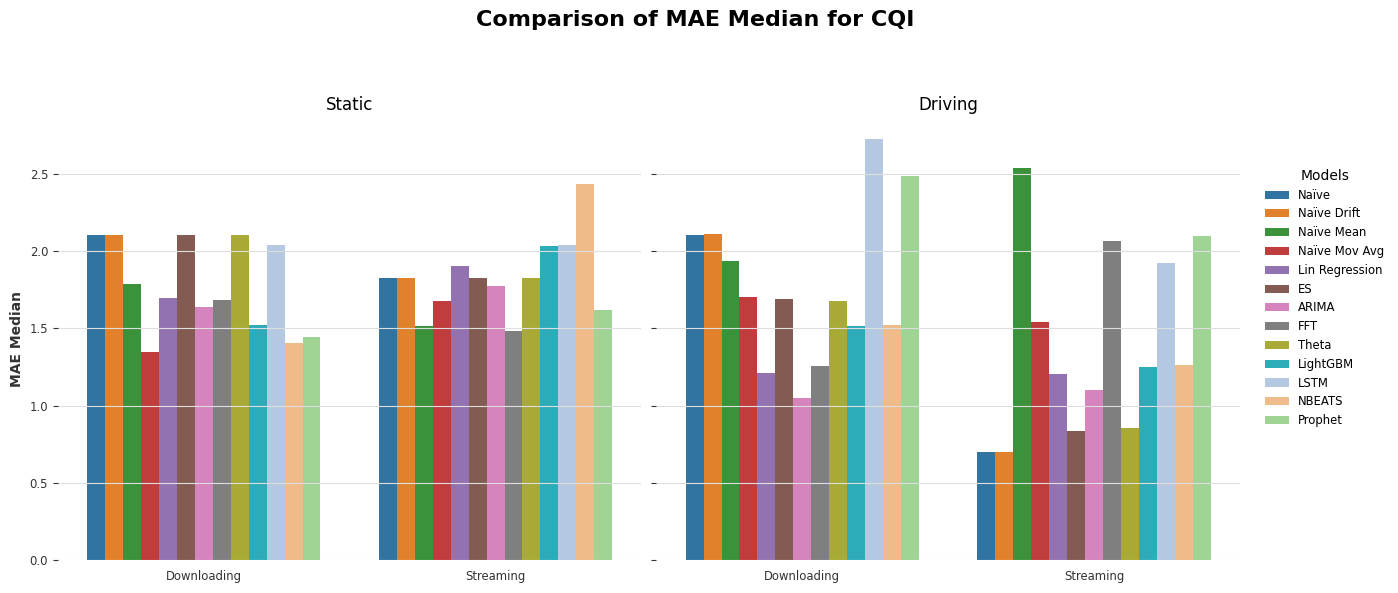

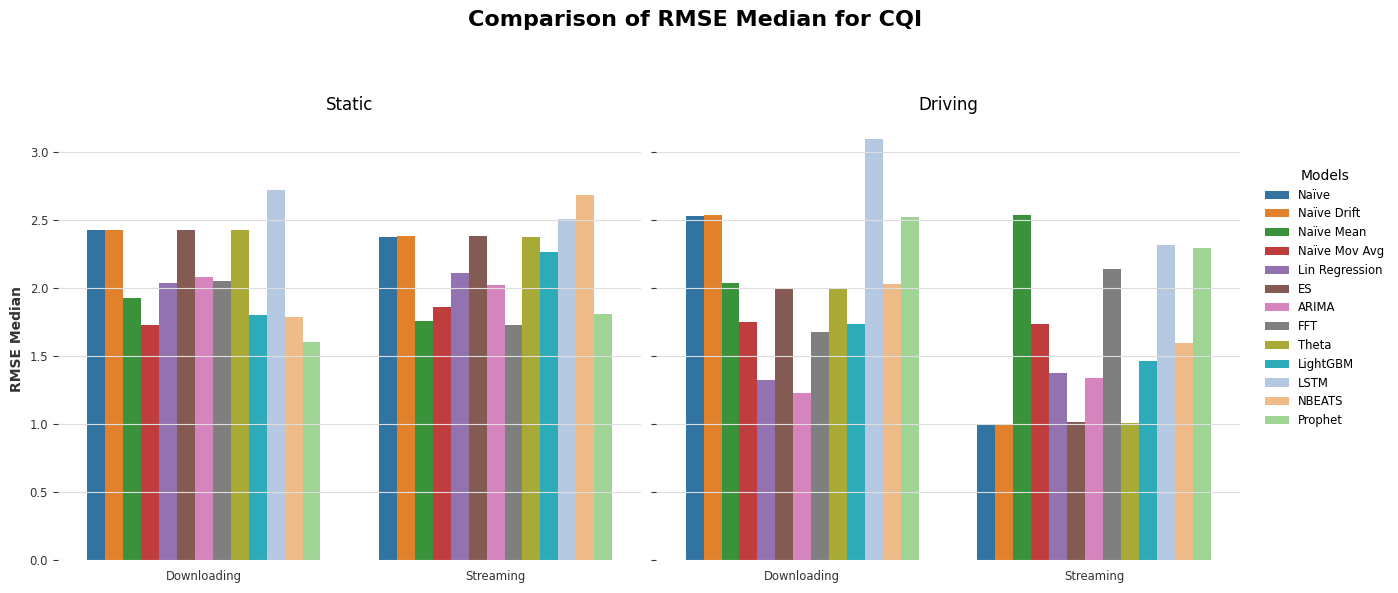

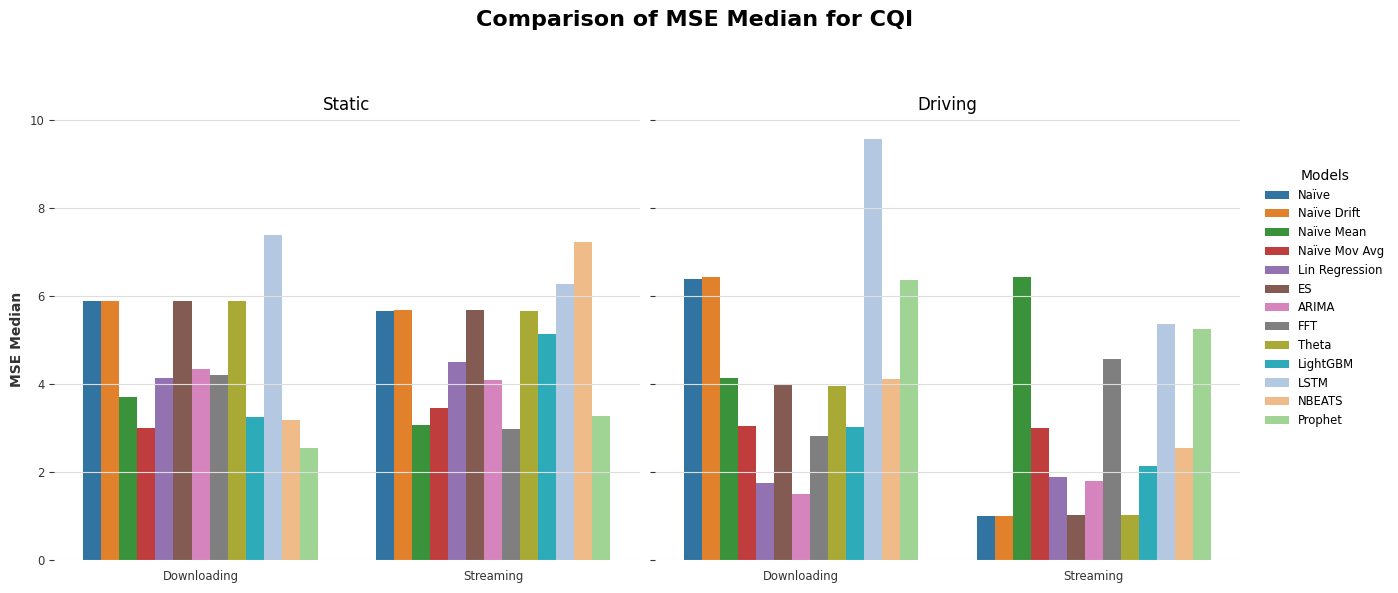

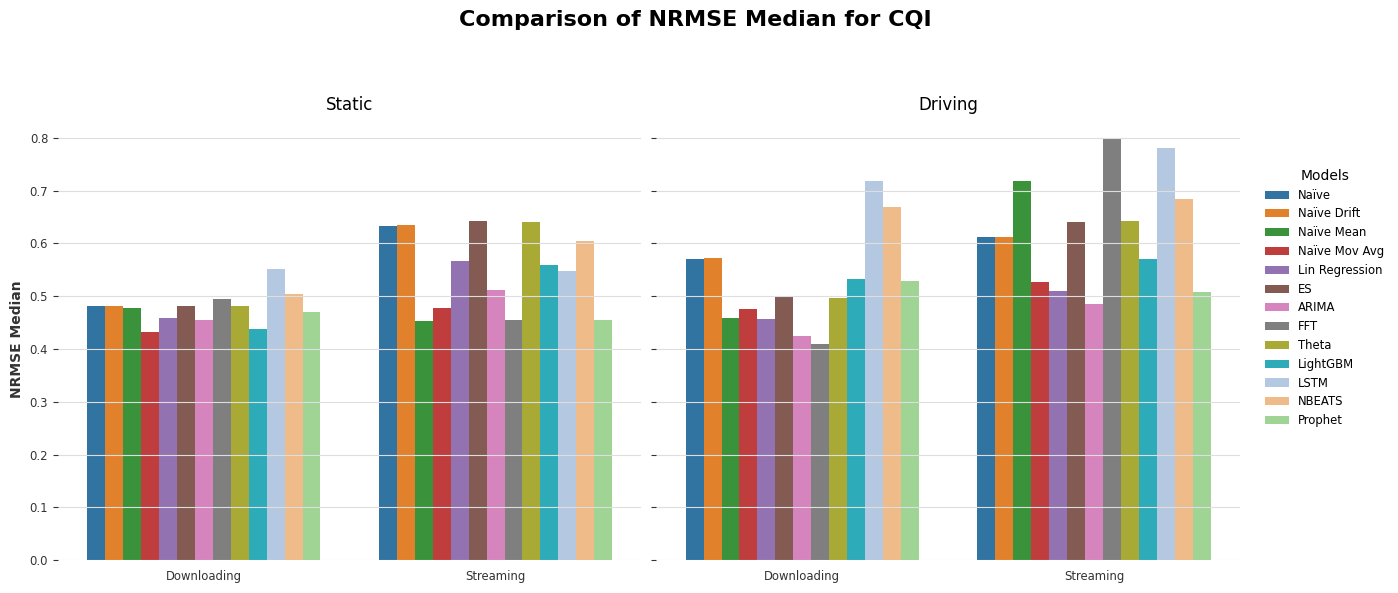

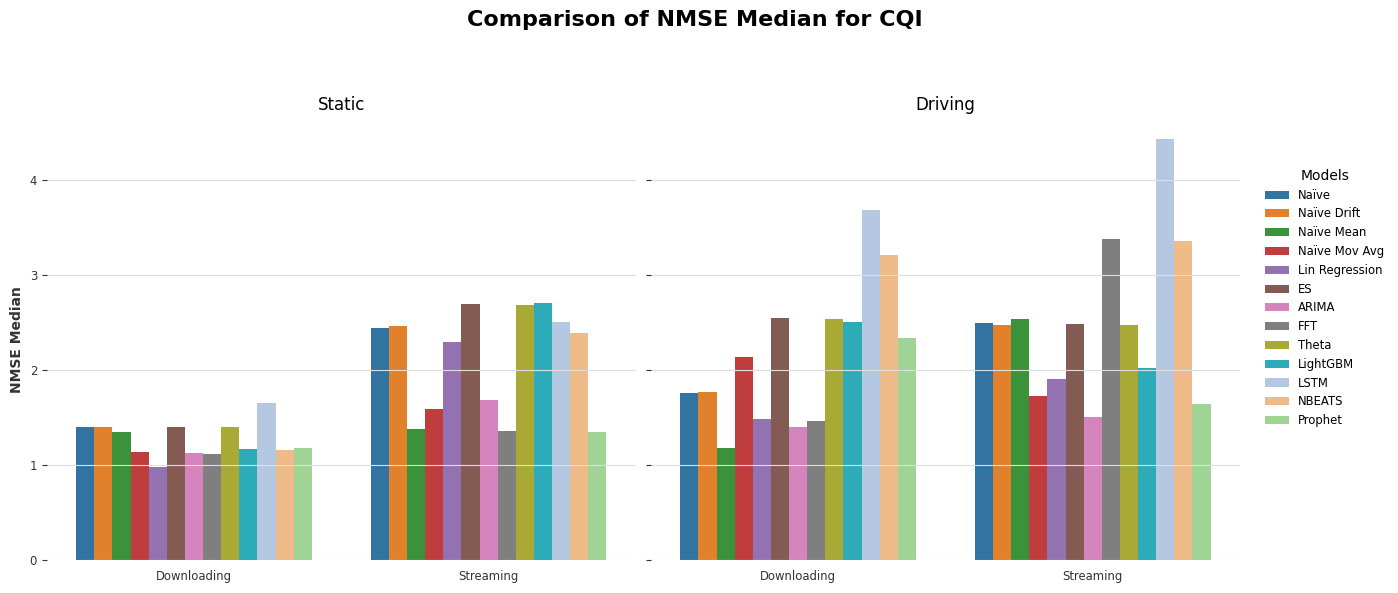

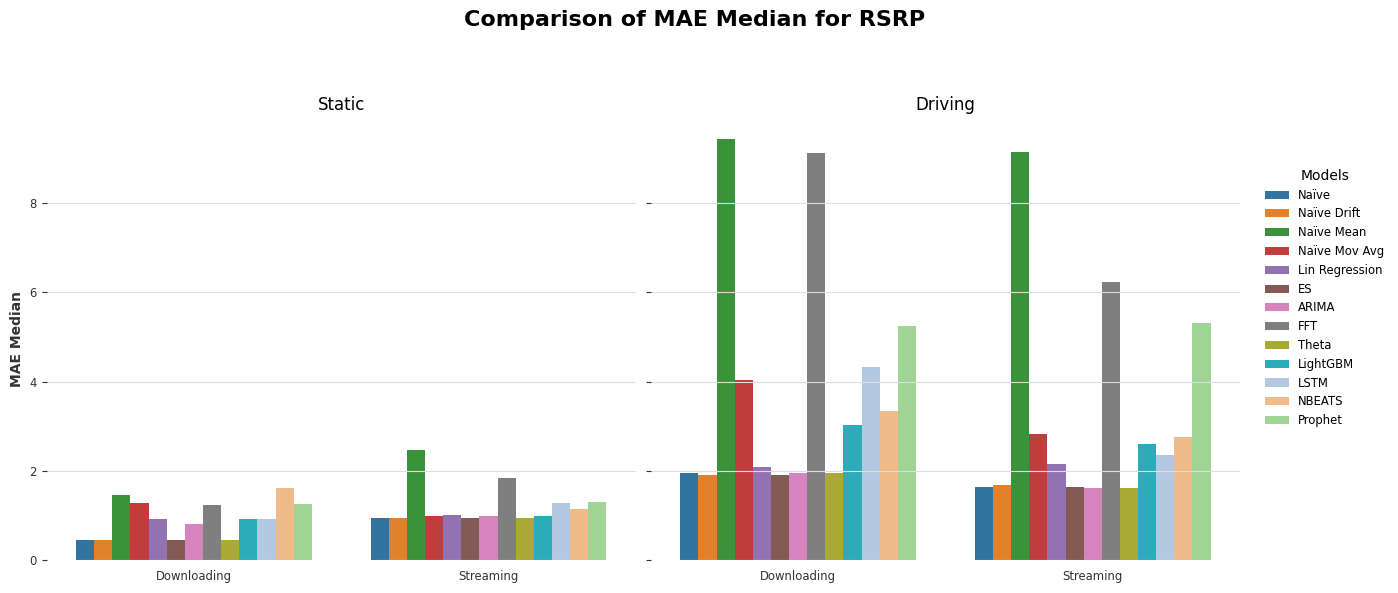

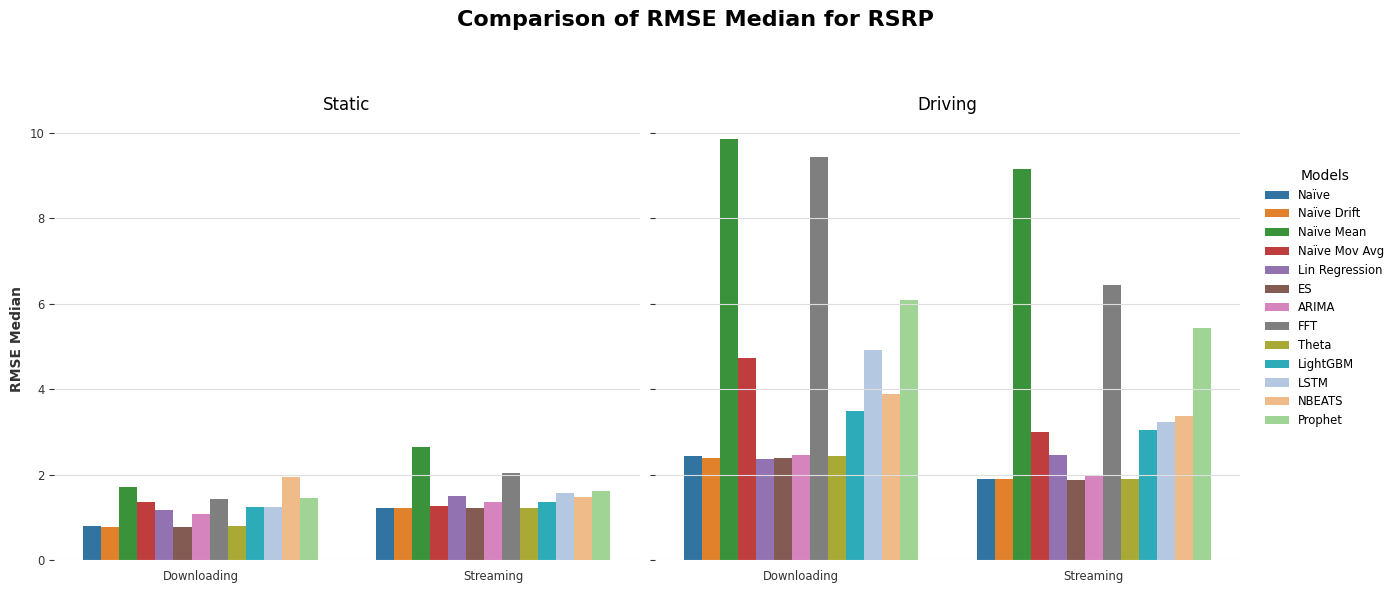

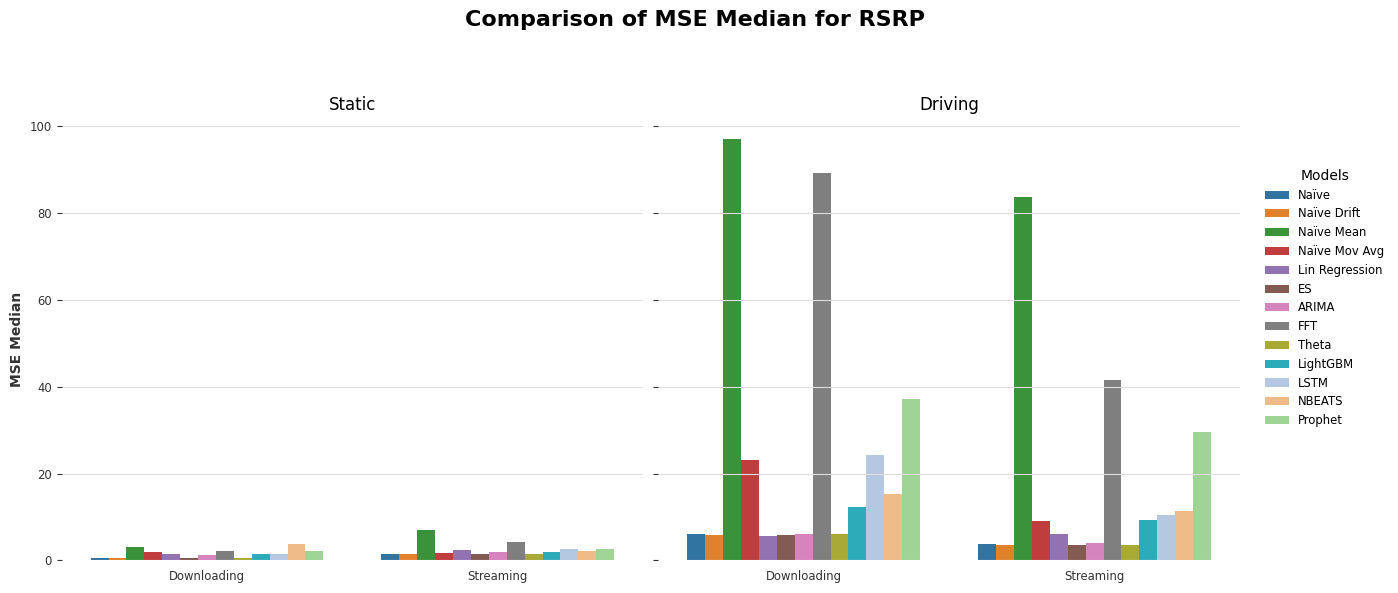

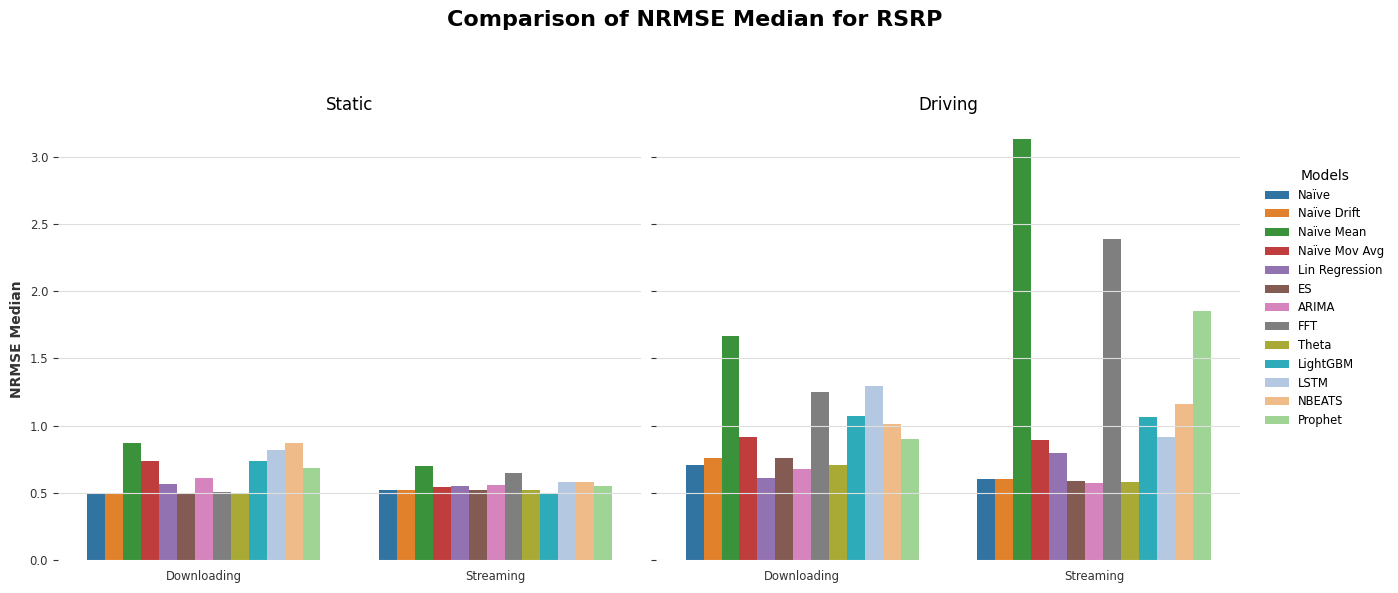

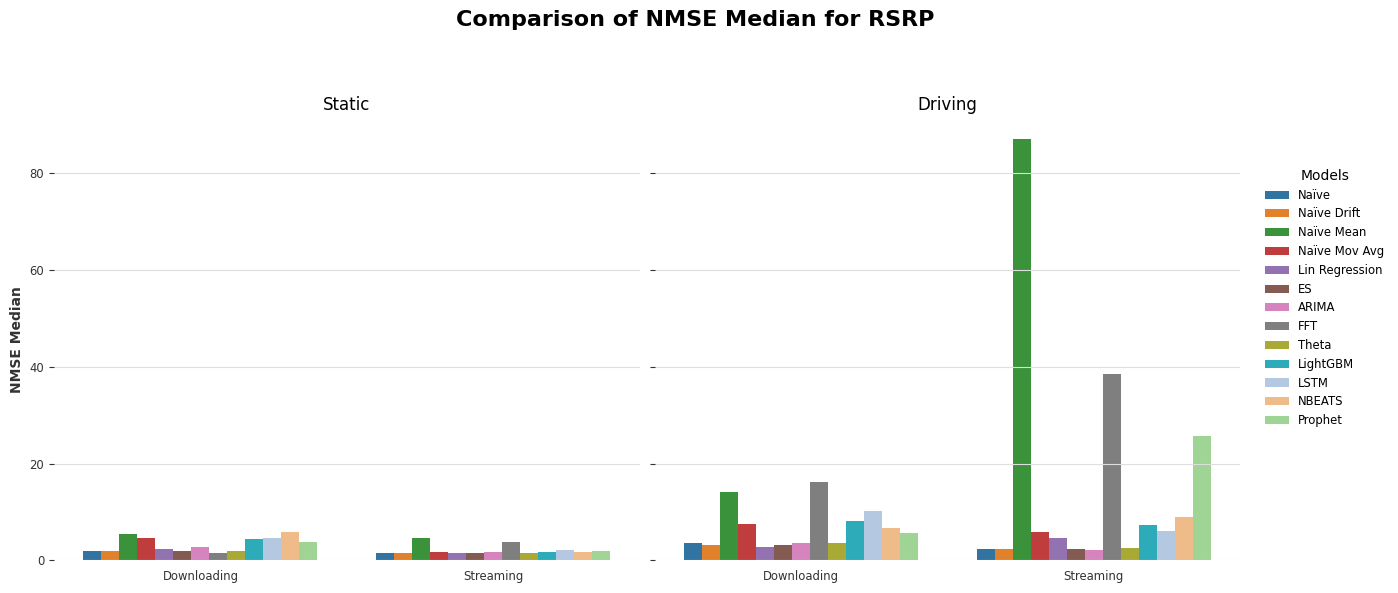

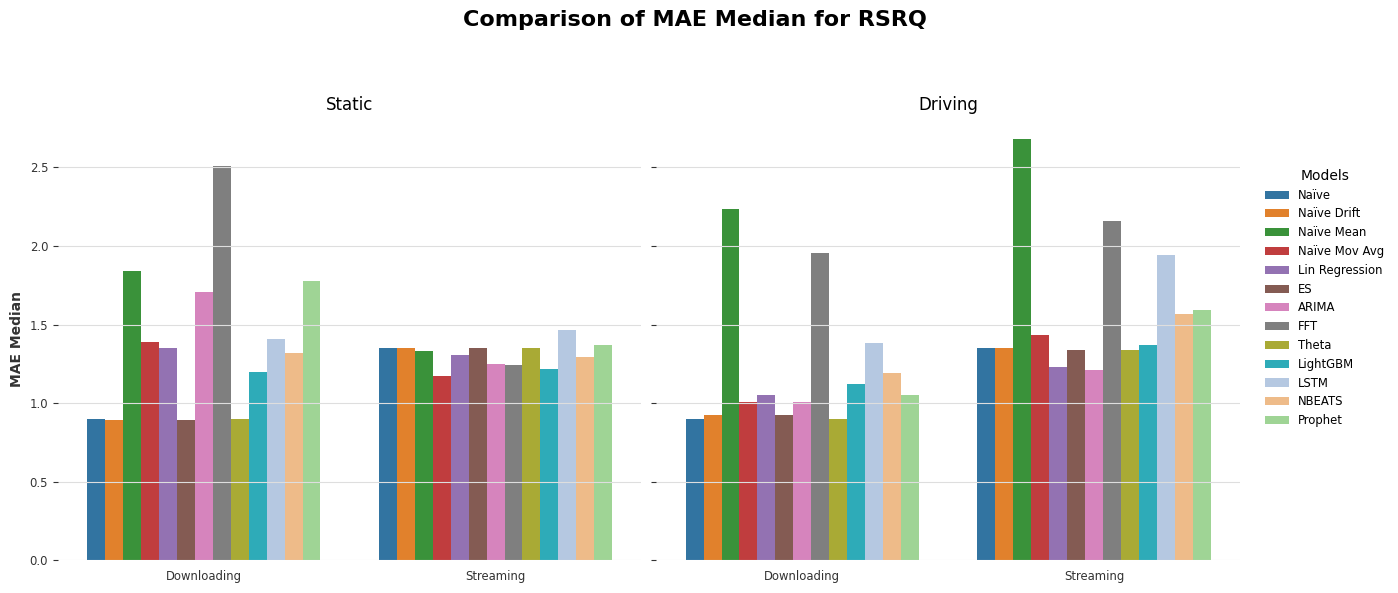

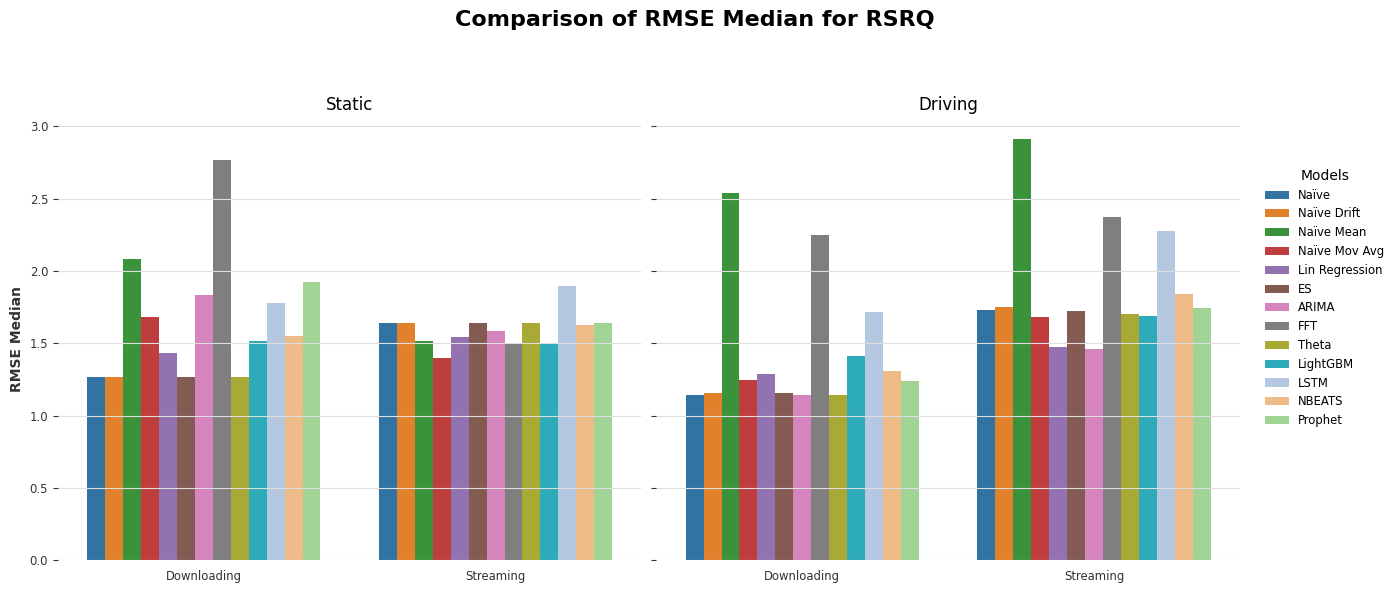

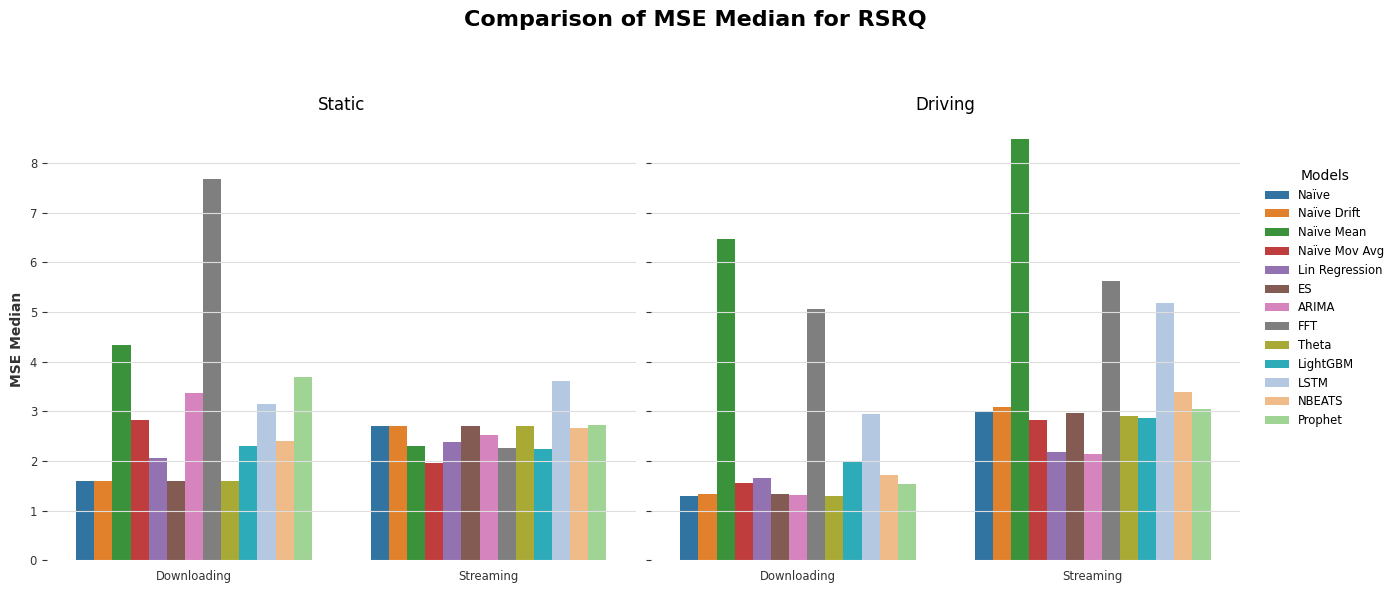

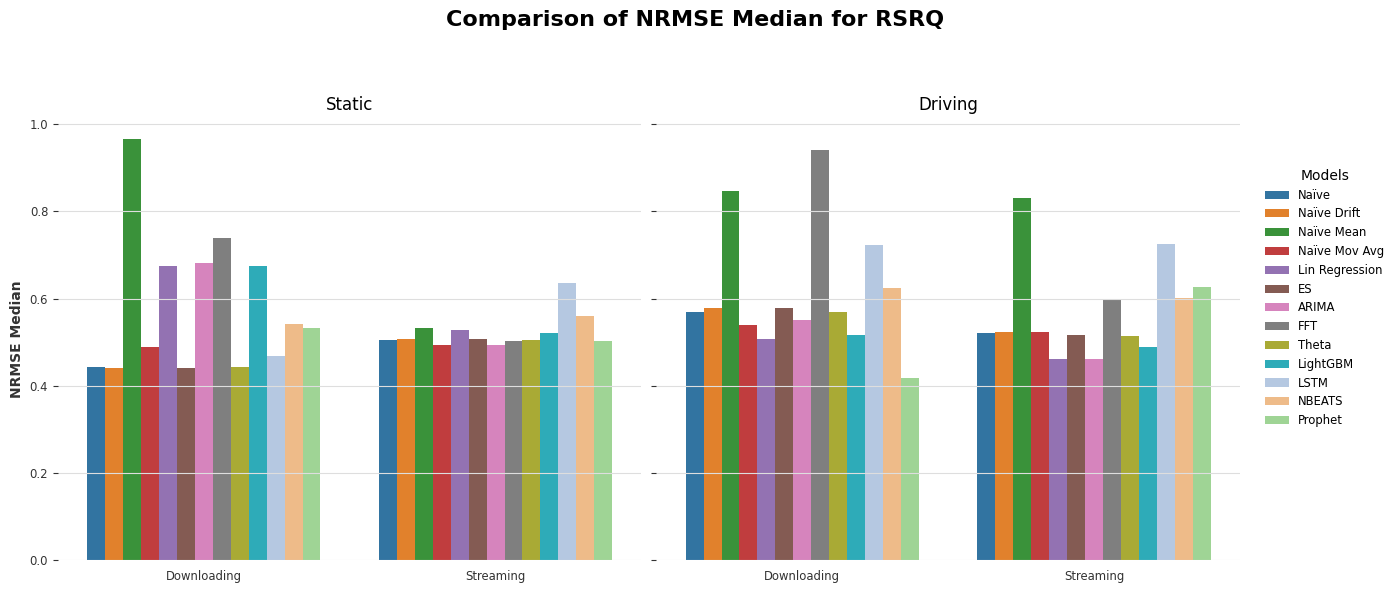

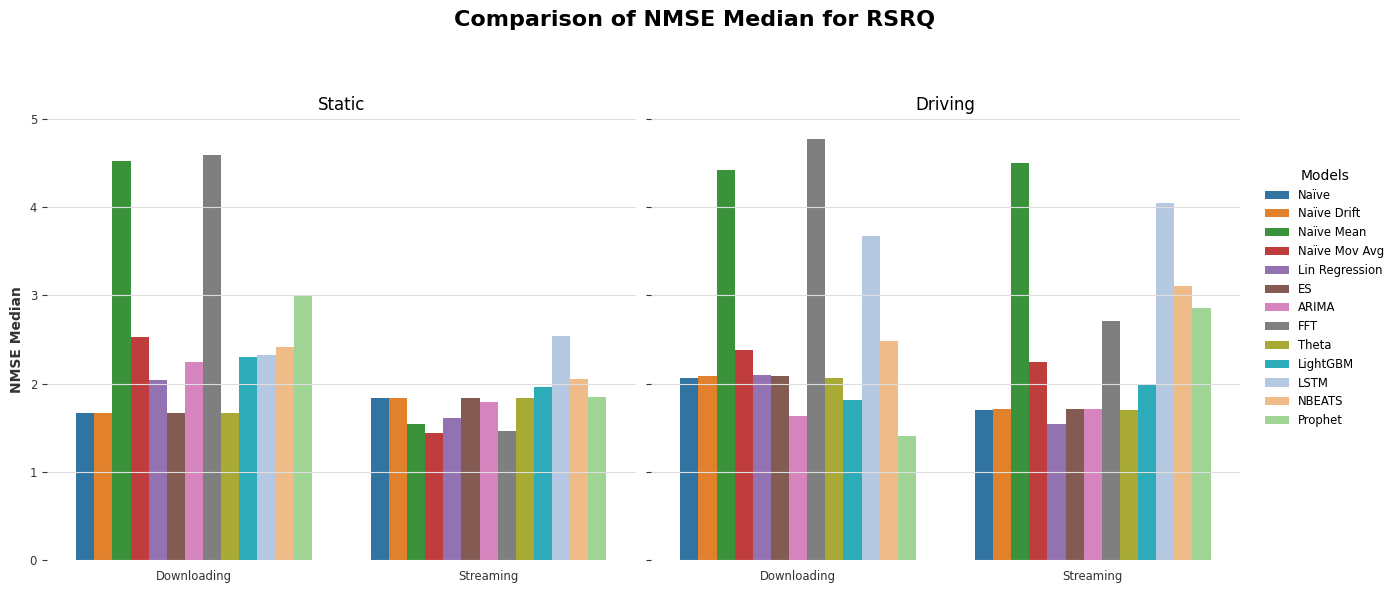

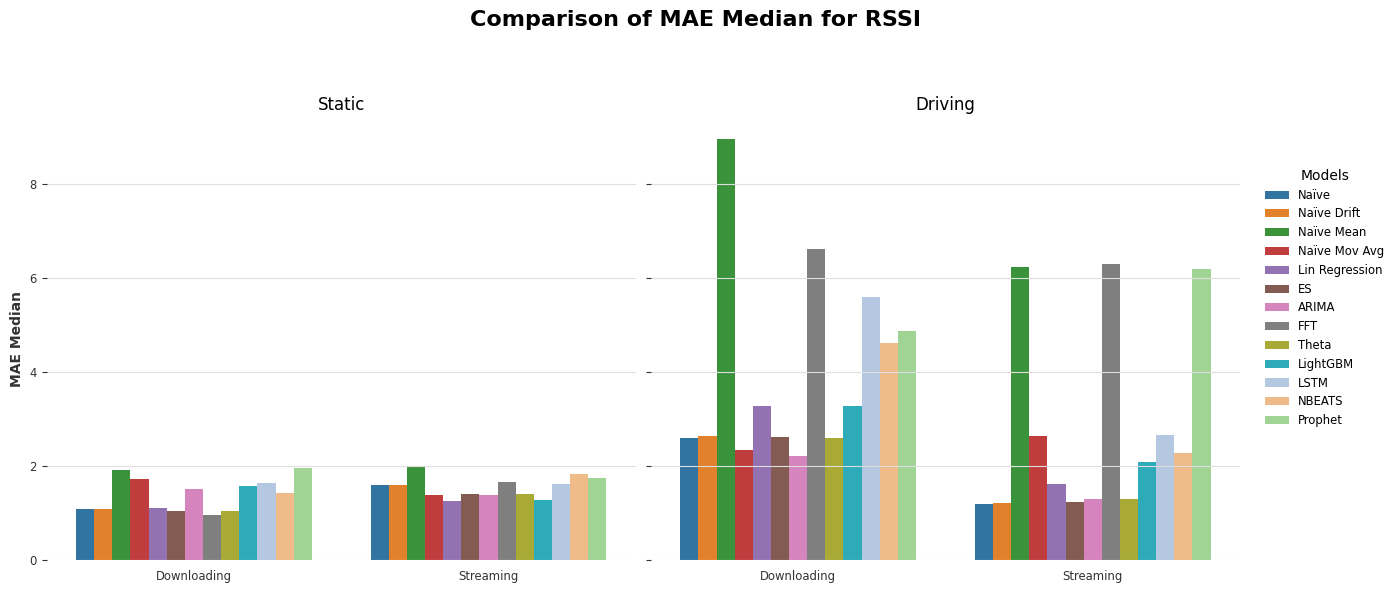

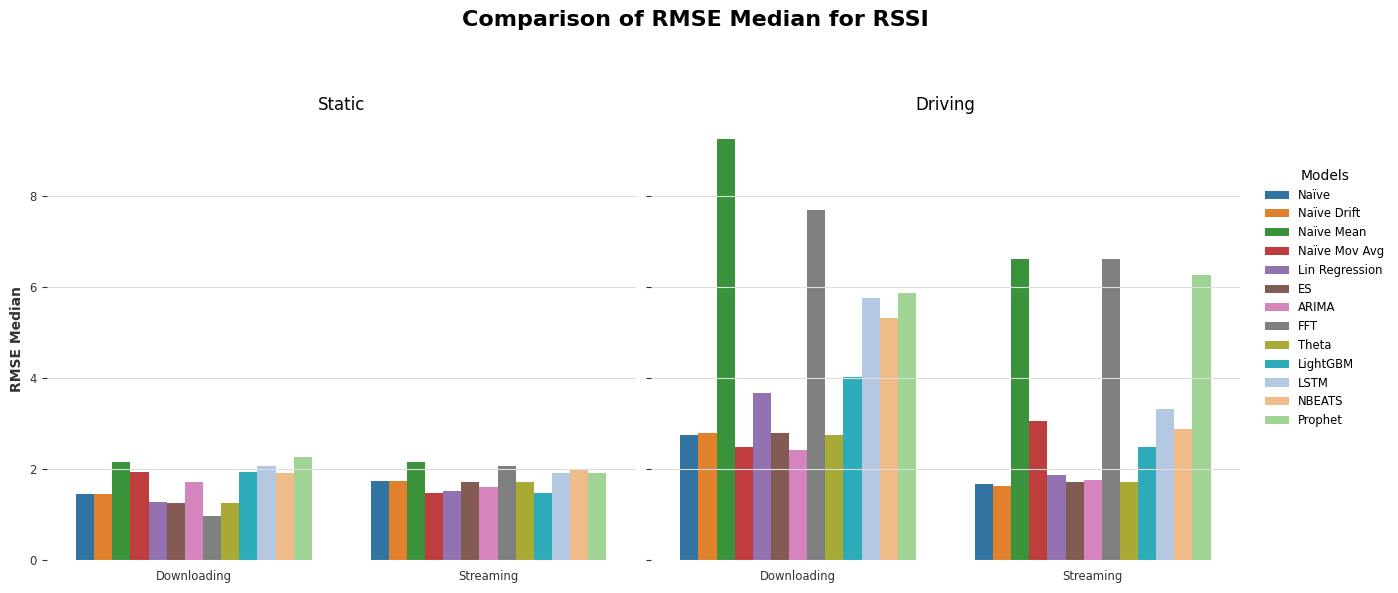

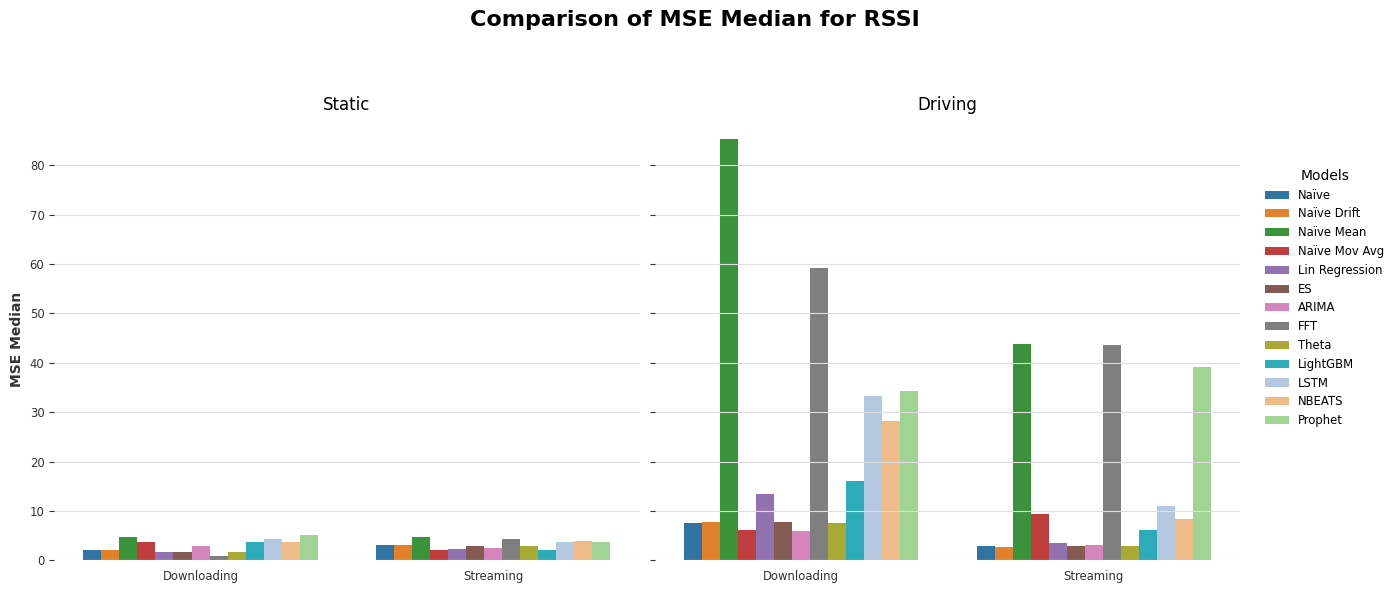

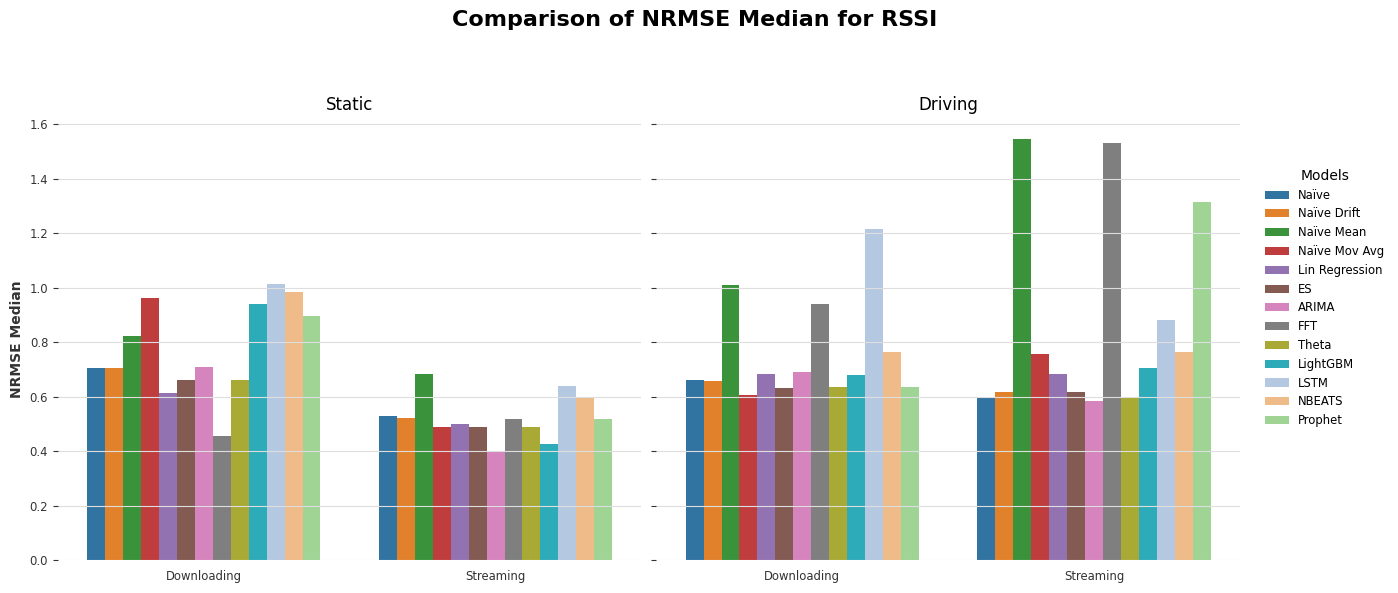

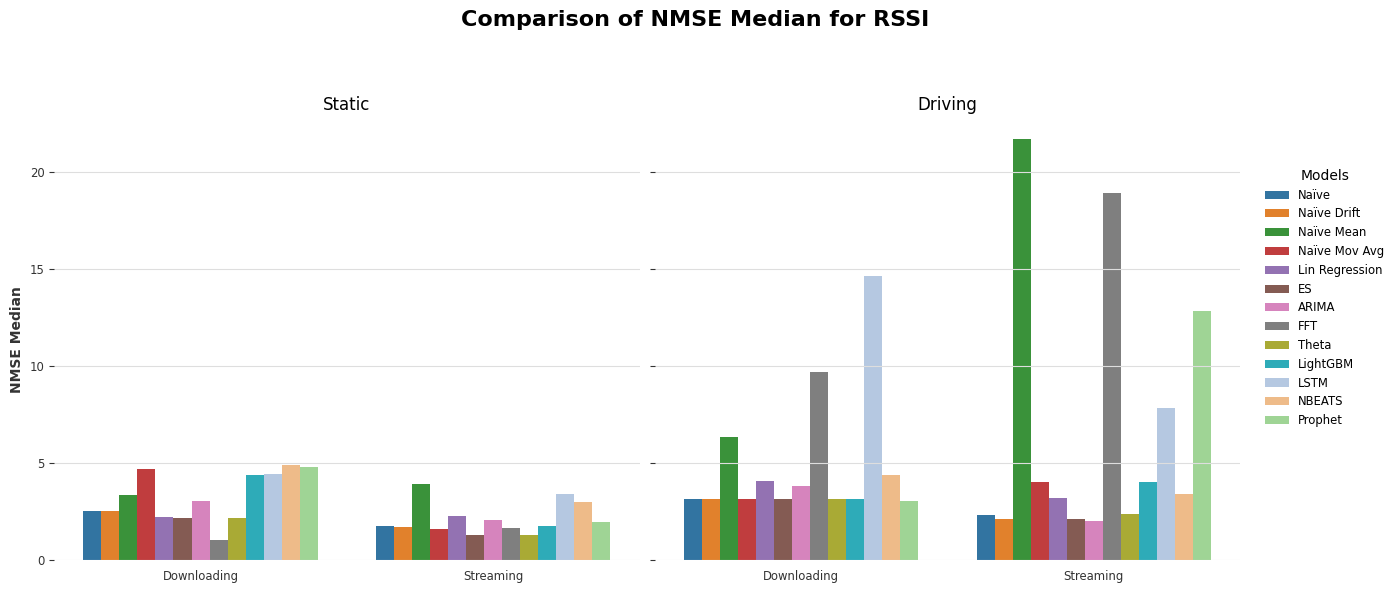

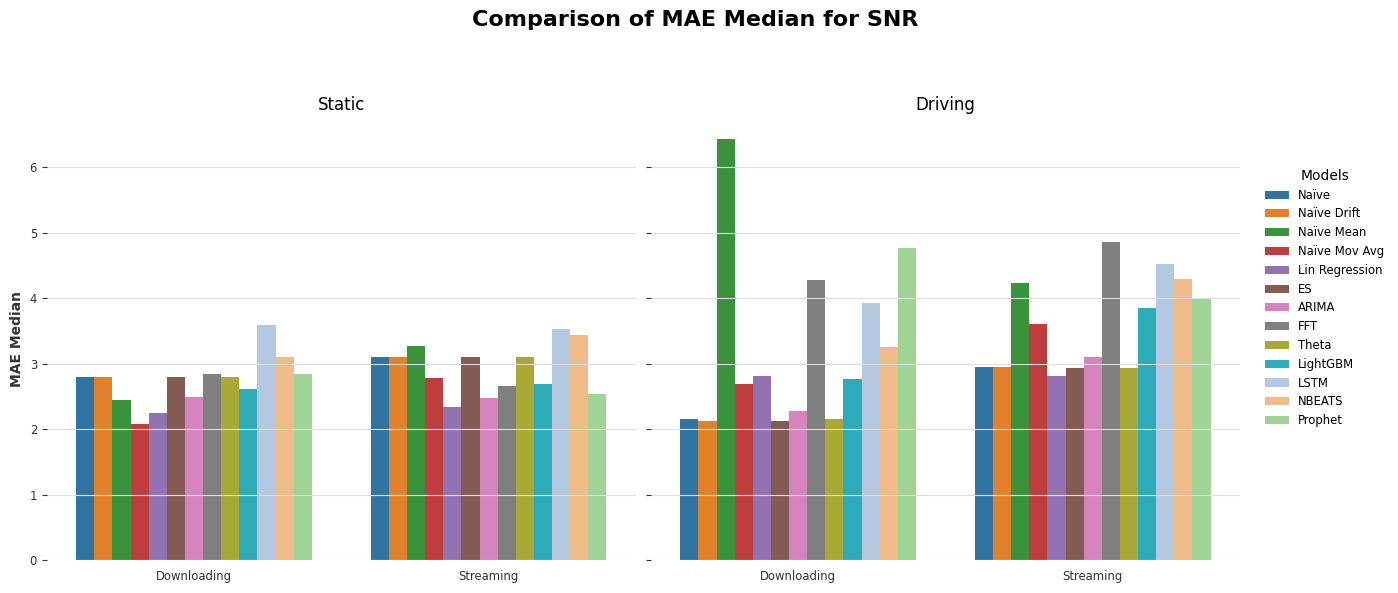

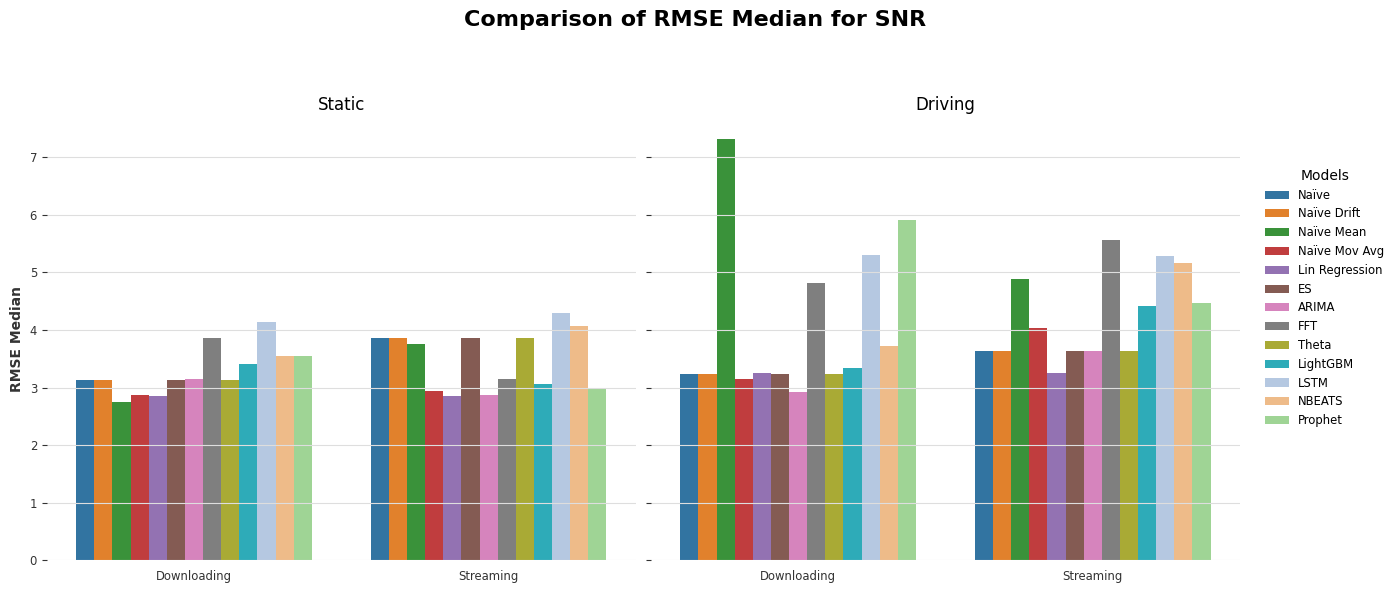

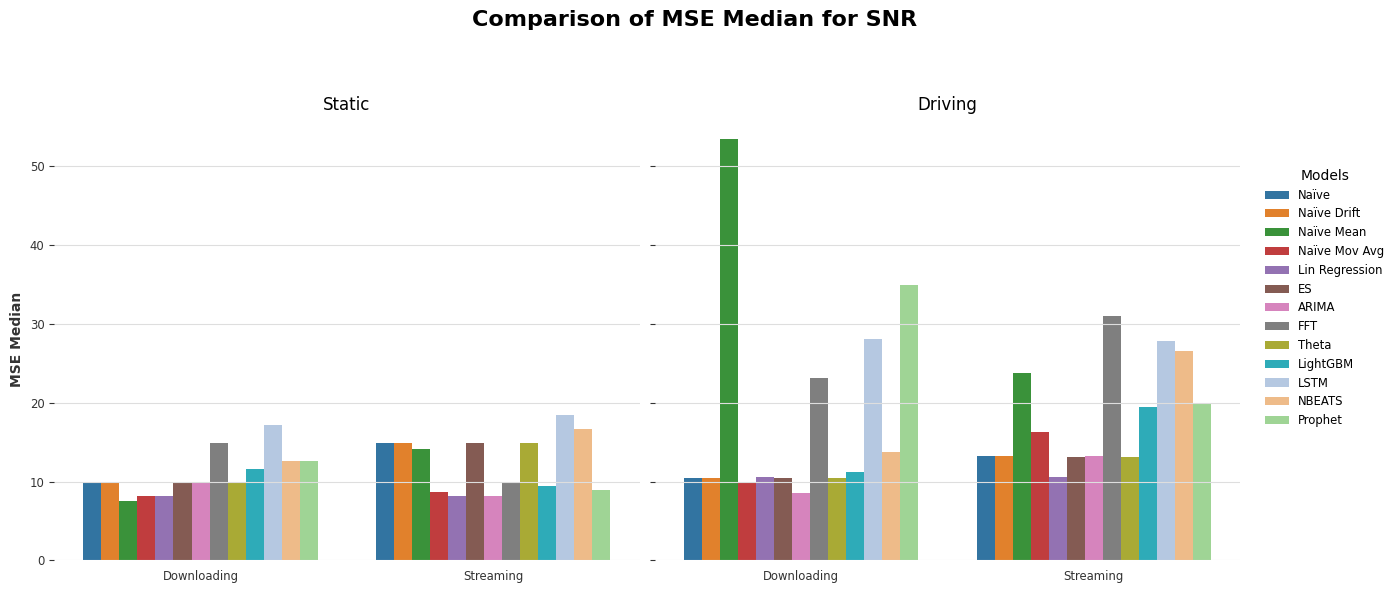

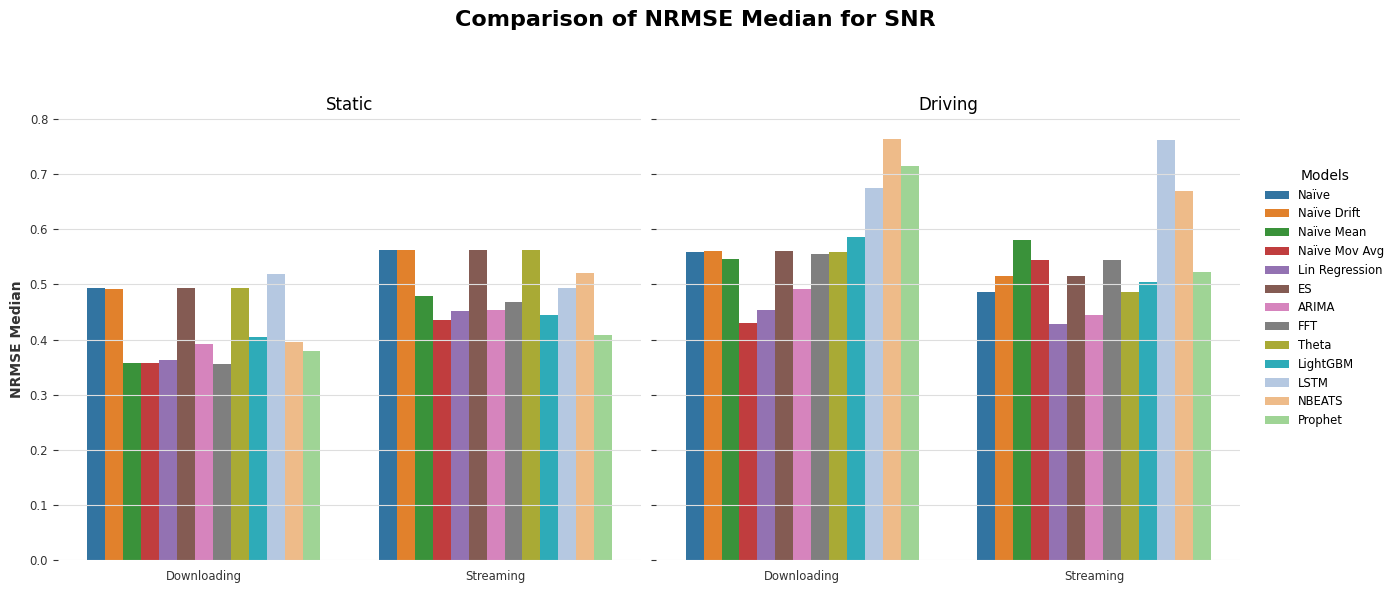

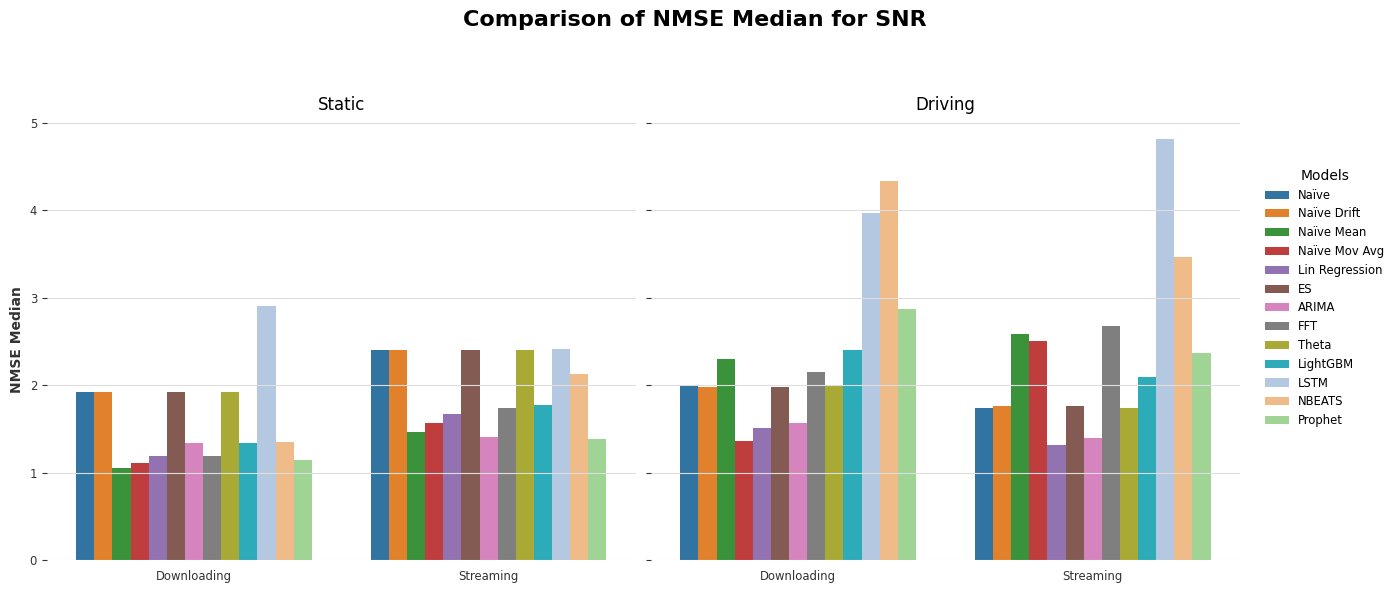

In [120]:
plot_bar_for_medians_by_target(agg_data)

## Boxplot das métricas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_boxplots_for_metrics_by_target(
    data: pd.DataFrame, show_outliers: bool = True
) -> None:
    """
    Generates boxplots for MAE, RMSE, MSE, NRMSE, and NMSE grouped by 'Model', 'target', and 'Activity',
    with separate plots for static and driving activities. Each metric gets its own figure.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data with columns 'Model', 'target', 'Activity', 'MAE', 'RMSE', 'MSE', 'NRMSE', 'NMSE'.
    show_outliers (bool): If True, outliers will be displayed. If False, they will be hidden. Default is True.

    Returns:
    None: Displays the boxplot graphs.
    """
    # Define a custom color palette
    custom_colors = [
        "#1f77b4",
        "#ff7f0e",
        "#2ca02c",
        "#d62728",
        "#9467bd",
        "#8c564b",
        "#e377c2",
        "#7f7f7f",
        "#bcbd22",
        "#17becf",
        "#aec7e8",
        "#ffbb78",
        "#98df8a",
    ]

    # Desired label mapping
    label_mapping = {
        "Naive": "Naïve",
        "NaiveDrift": "Naïve Drift",
        "NaiveMean": "Naïve Mean",
        "NaiveMovingAverage": "Naïve Mov Avg",
        "LinearRegression": "Lin Regression",
        "ExponentialSmoothing": "ES",
        "ARIMA": "ARIMA",
        "FFT": "FFT",
        "Theta": "Theta",
        "LightGBM": "LightGBM",
        "LSTM": "LSTM",
        "NBEATS": "NBEATS",
        "Prophet": "Prophet",
    }

    # Define the desired order of models
    model_order = [
        "Naive",
        "NaiveDrift",
        "NaiveMean",
        "NaiveMovingAverage",  # Baseline benchmarks
        "LinearRegression",
        "ExponentialSmoothing",  # Standard benchmarks
        "ARIMA",
        "FFT",
        "Theta",  # Statistical methods
        "LightGBM",
        "LSTM",
        "NBEATS",
        "Prophet",  # Machine Learning models
    ]

    # Define the desired order of activities
    static_activities = ["static_down", "static_strm"]
    driving_activities = ["driving_down", "driving_strm"]

    # List of metrics
    metrics = ["MAE", "RMSE", "MSE", "NRMSE", "NMSE"]

    # Get unique targets
    targets = data["target"].unique()

    # Assign colors to models using the custom color palette
    model_palette = dict(zip(model_order, custom_colors[: len(model_order)]))

    # Loop through the targets (e.g., CQI, RSRP, RSRQ, RSSI, SNR)
    for target in targets:
        # Filter the data for the current target
        data_subset = data[data["target"] == target]

        for metric in metrics:
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Static activities
            static_data = data_subset[data_subset["Activity"].isin(static_activities)]
            sns.boxplot(
                data=static_data,
                x="Activity",
                y=metric,
                hue="Model",
                hue_order=[
                    m for m in model_order if m in static_data["Model"].unique()
                ],
                ax=axes[0],
                order=static_activities,
                showfliers=show_outliers,
                palette=model_palette,
            )
            axes[0].set_title("Static")
            axes[0].set_ylabel(metric)
            axes[0].set_xticks(range(2))
            axes[0].set_xticklabels(["Downloading", "Streaming"])
            axes[0].set_xlabel("")
            axes[0].legend().remove()

            # Driving activities
            driving_data = data_subset[data_subset["Activity"].isin(driving_activities)]
            sns.boxplot(
                data=driving_data,
                x="Activity",
                y=metric,
                hue="Model",
                hue_order=[
                    m for m in model_order if m in driving_data["Model"].unique()
                ],
                ax=axes[1],
                order=driving_activities,
                showfliers=show_outliers,
                palette=model_palette,
            )
            axes[1].set_title("Driving")
            axes[1].set_xticks(range(2))
            axes[1].set_xticklabels(["Downloading", "Streaming"])
            axes[1].set_xlabel("")
            axes[1].legend().remove()

            # Ajusta espaçamento entre os gráficos
            plt.subplots_adjust(wspace=0.3)

            # Ajuste da legenda global
            handles, labels = axes[1].get_legend_handles_labels()
            # Replace labels with the new mapped labels
            updated_labels = [label_mapping.get(label, label) for label in labels]

            fig.legend(
                handles,
                updated_labels,
                loc="center left",
                ncol=1,
                bbox_to_anchor=(0.9, 0.5),
                fontsize="small",
                title="Models",
            )

            plt.suptitle(
                f"Comparison of {metric} for {target}", fontsize=16, fontweight="bold"
            )
            plt.tight_layout(rect=[0, 0, 0.9, 0.92])
            plt.show()

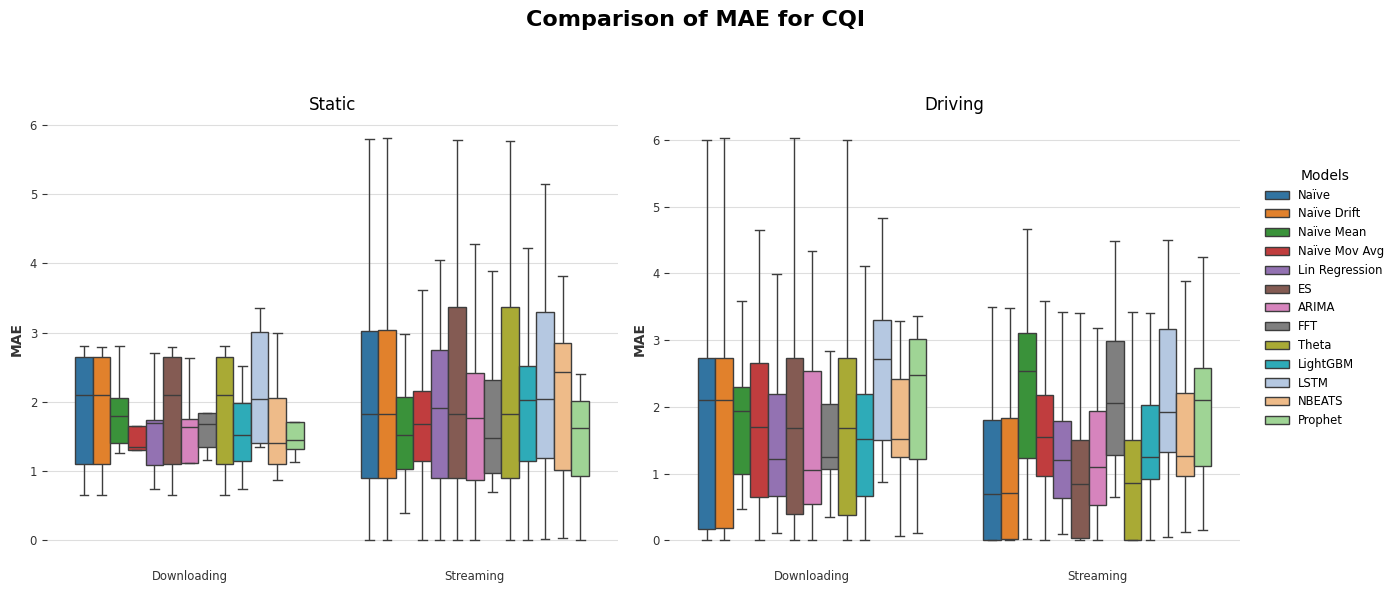

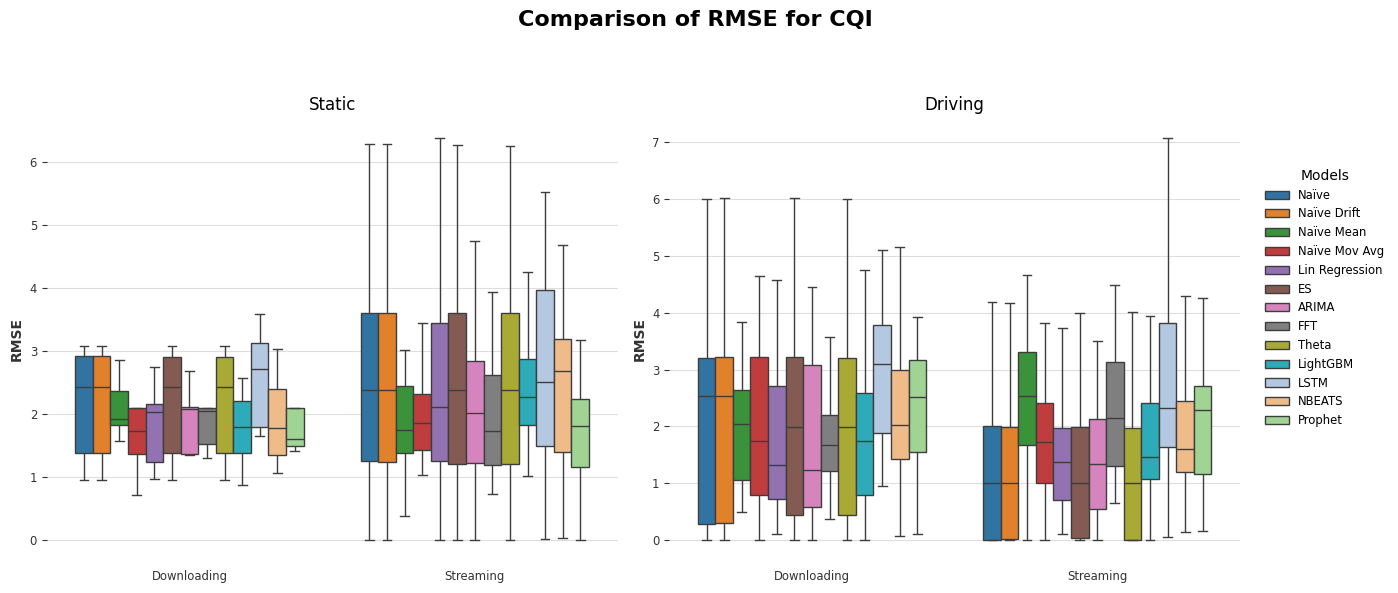

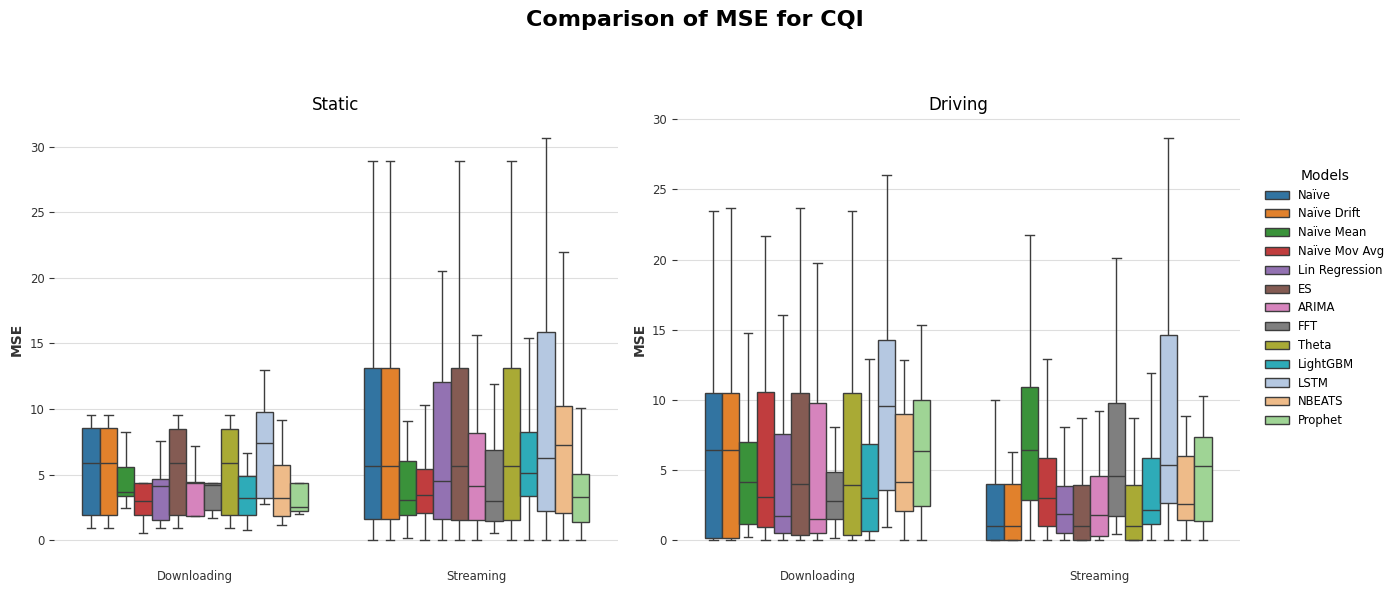

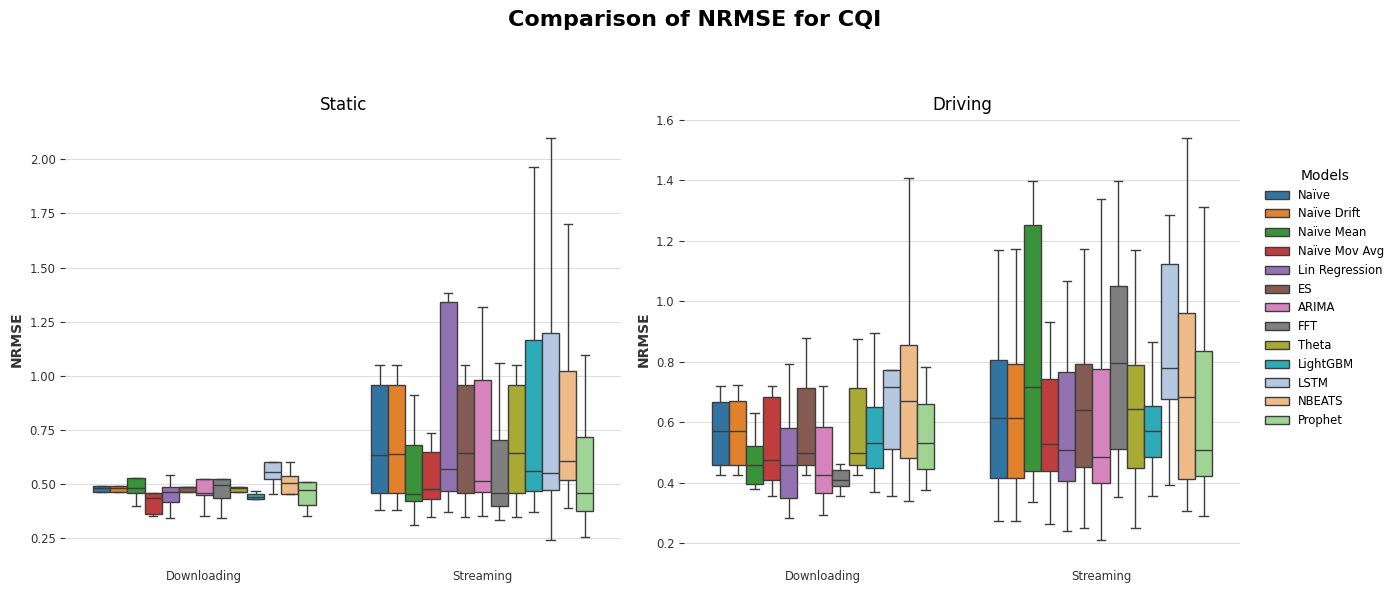

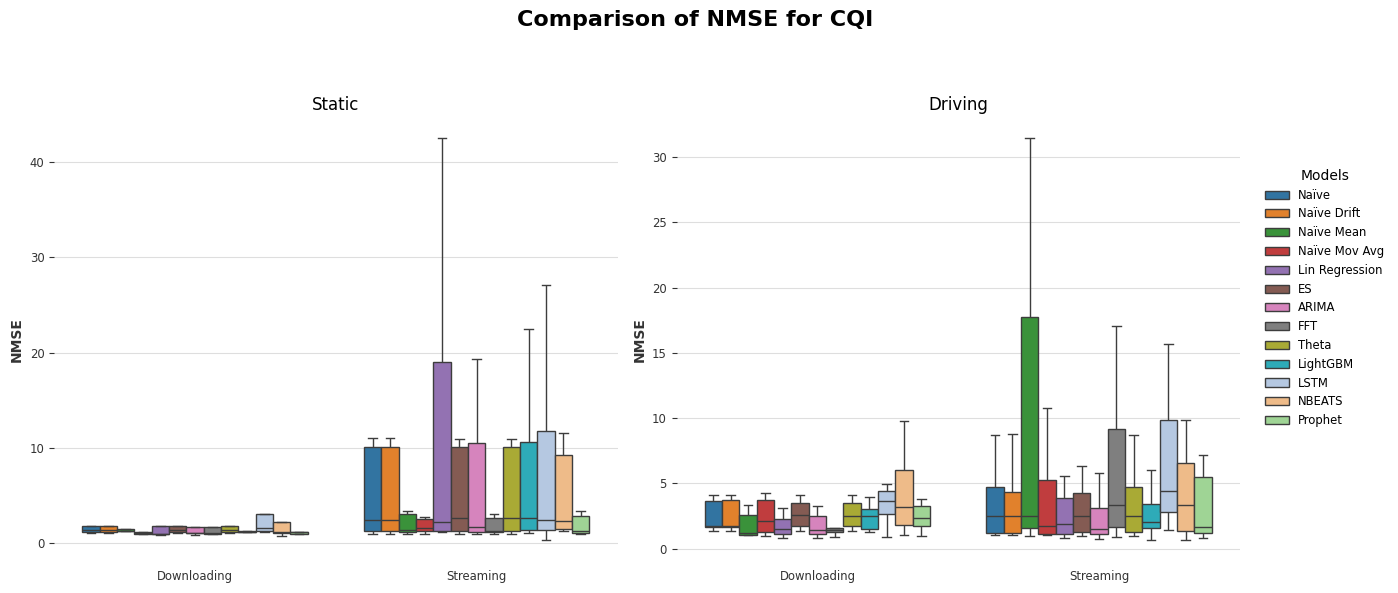

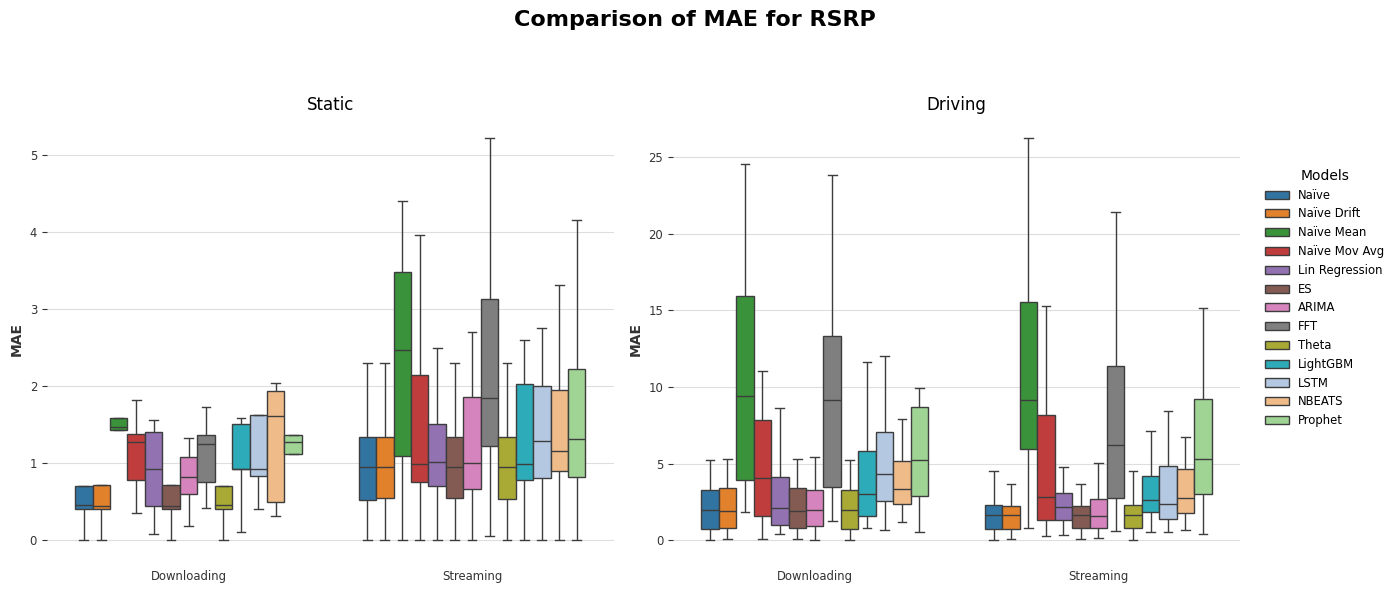

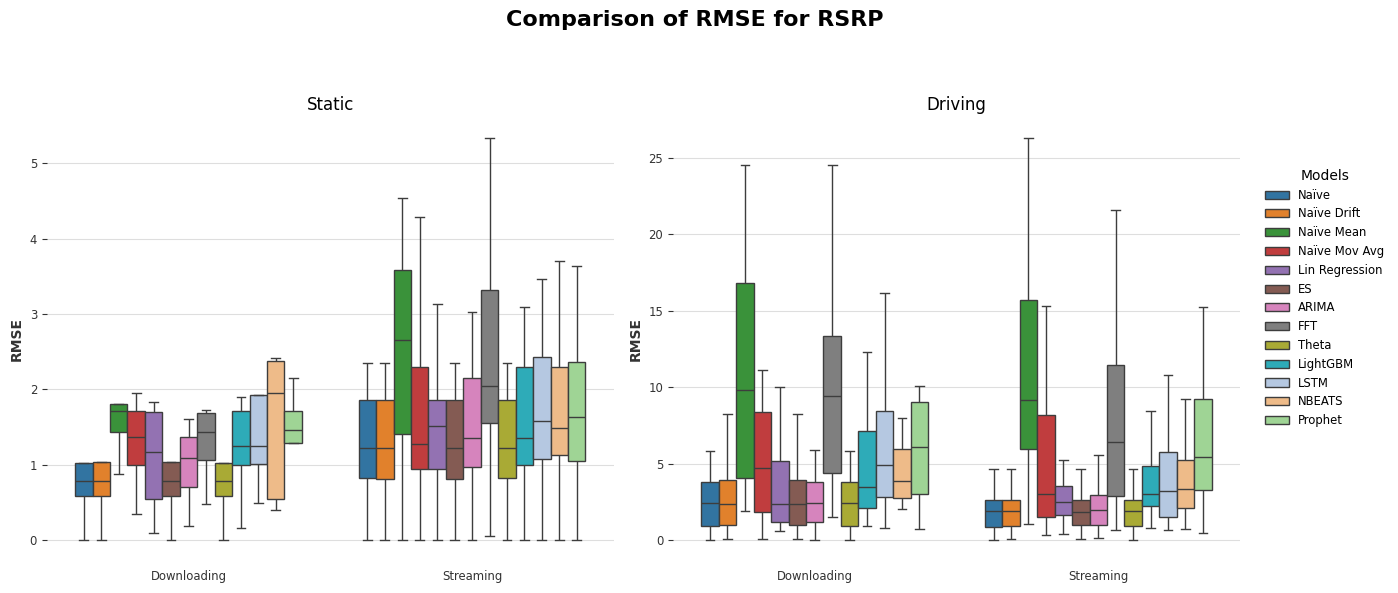

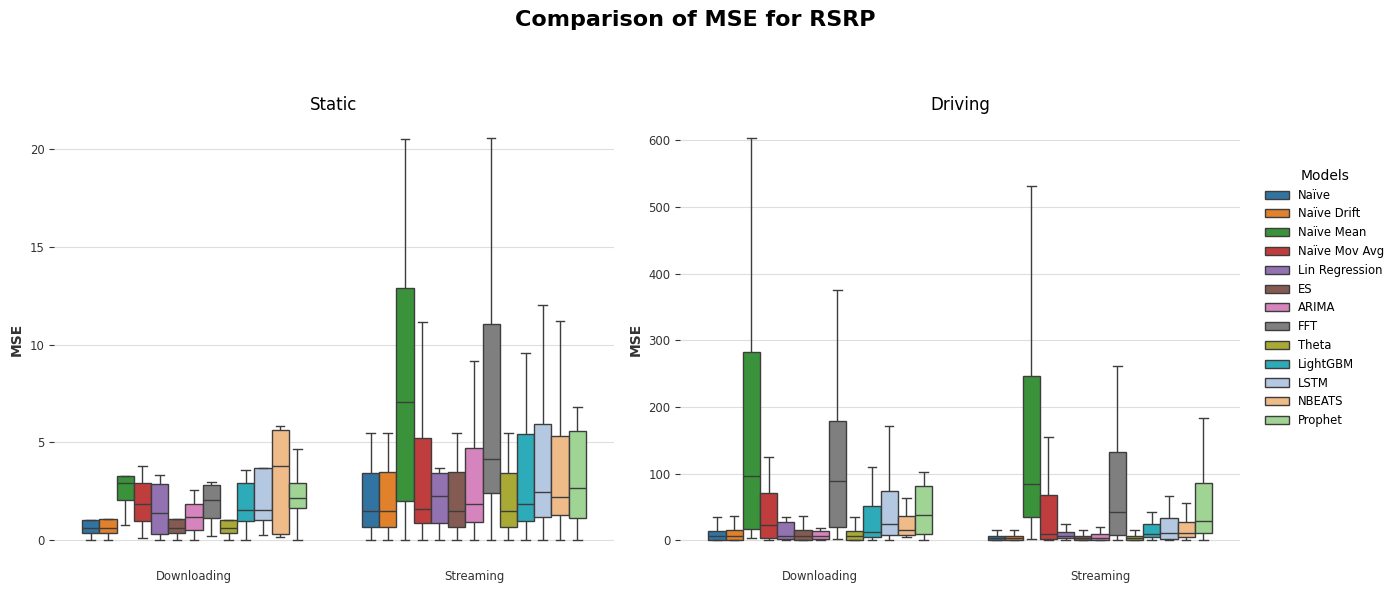

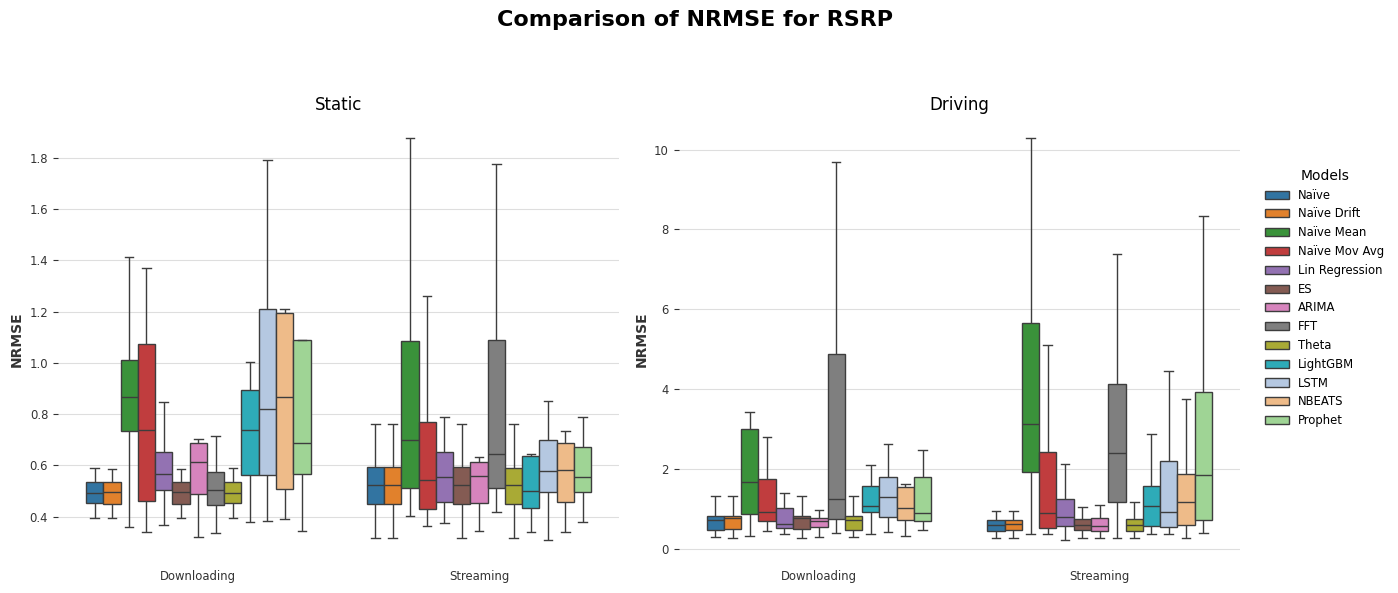

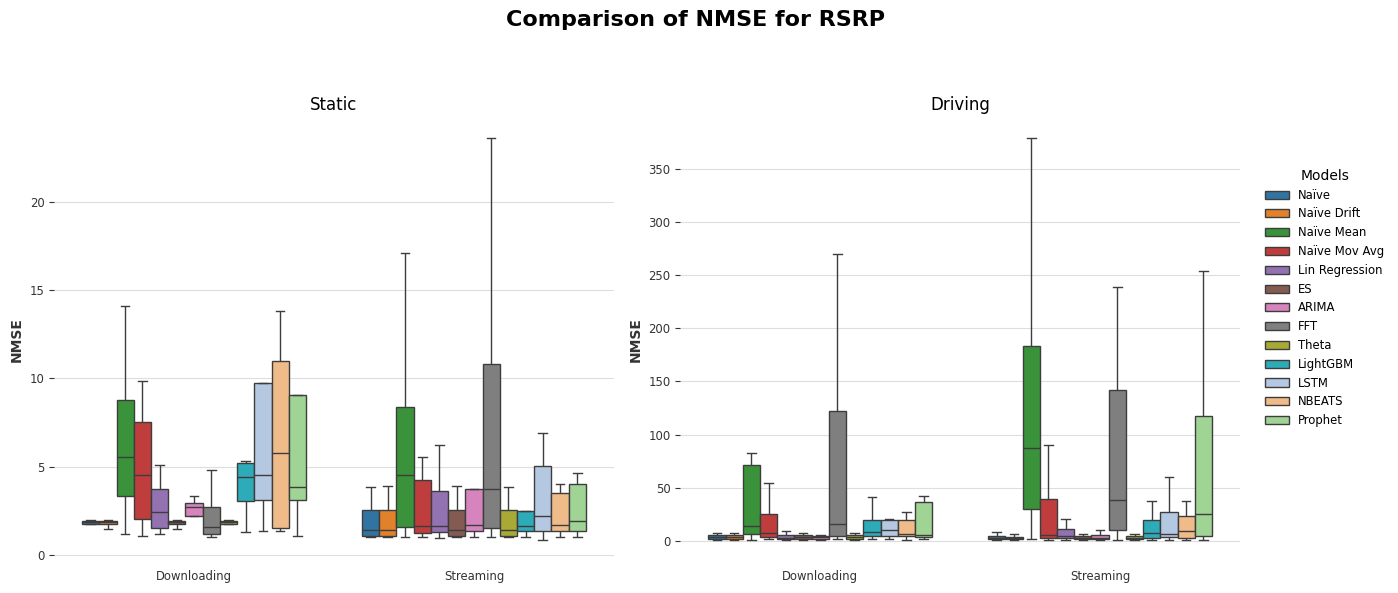

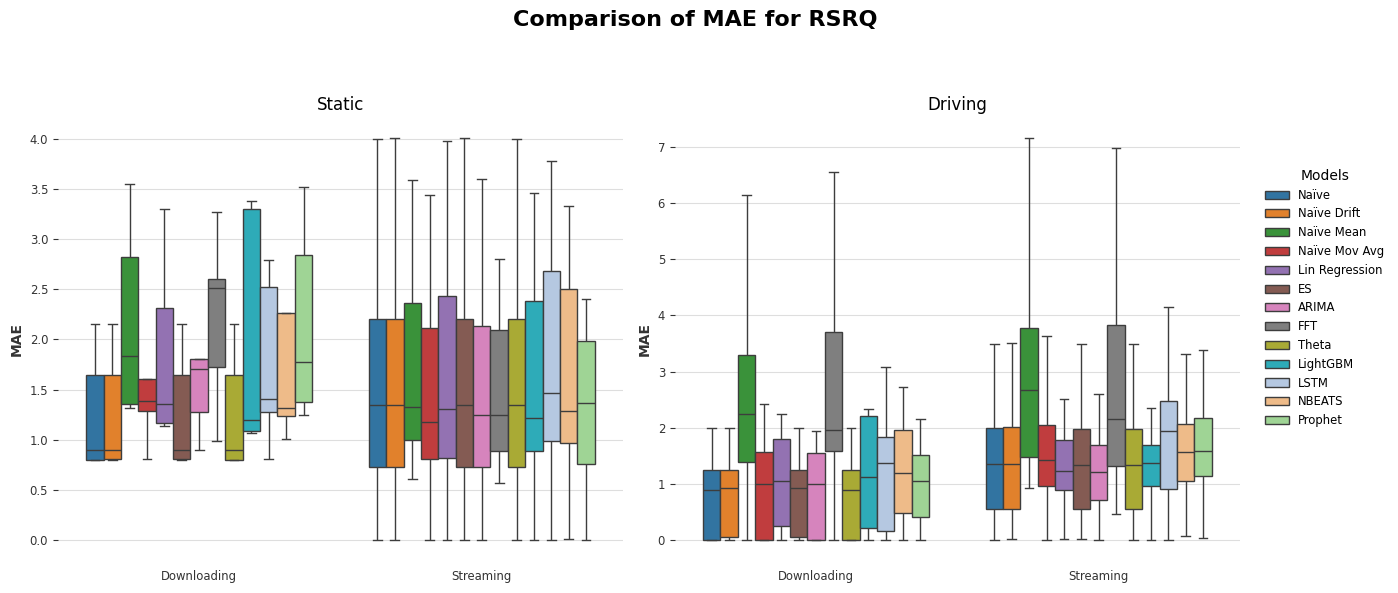

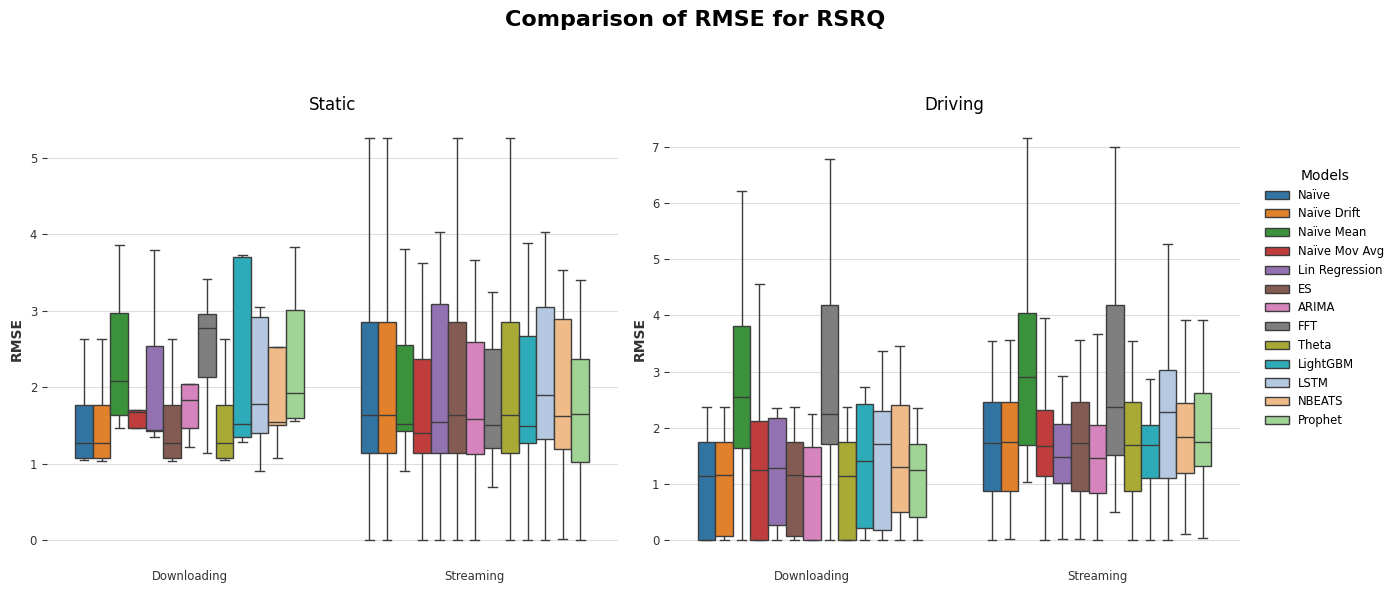

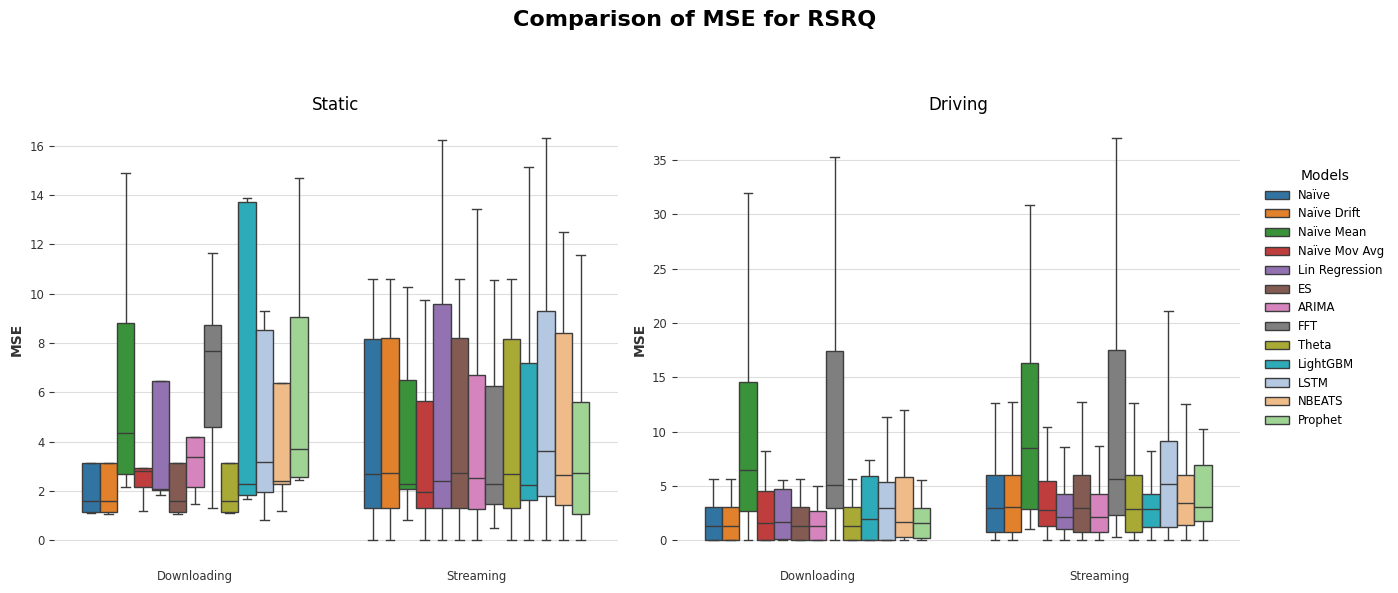

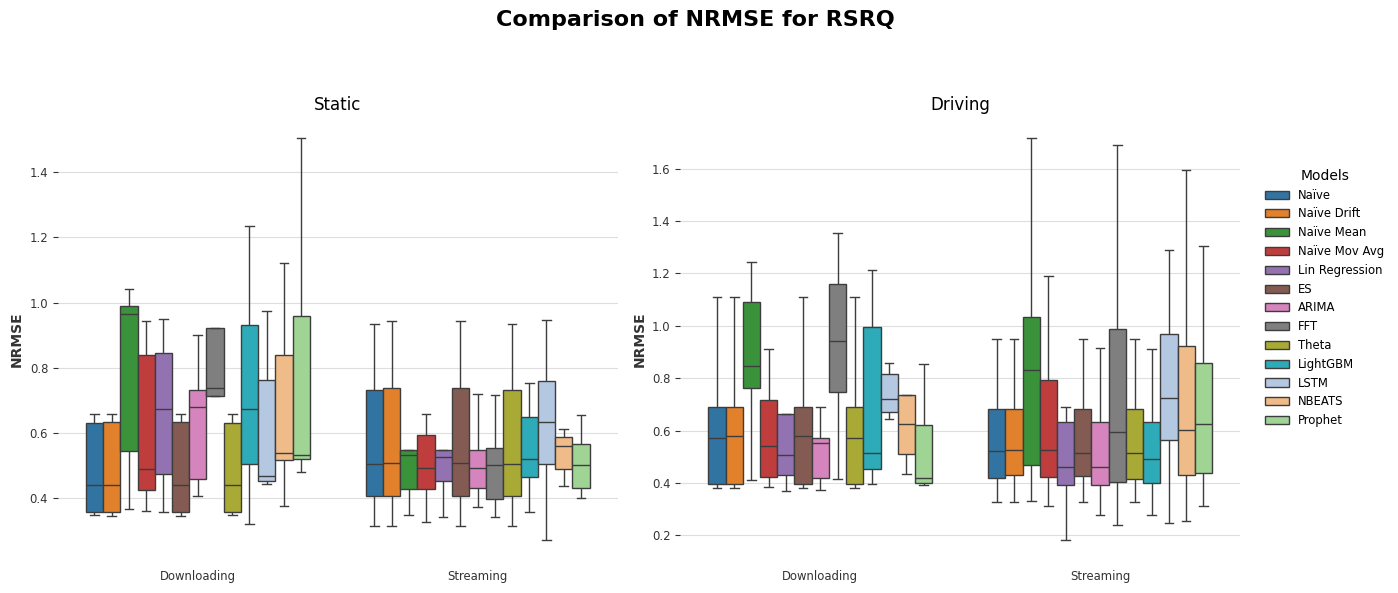

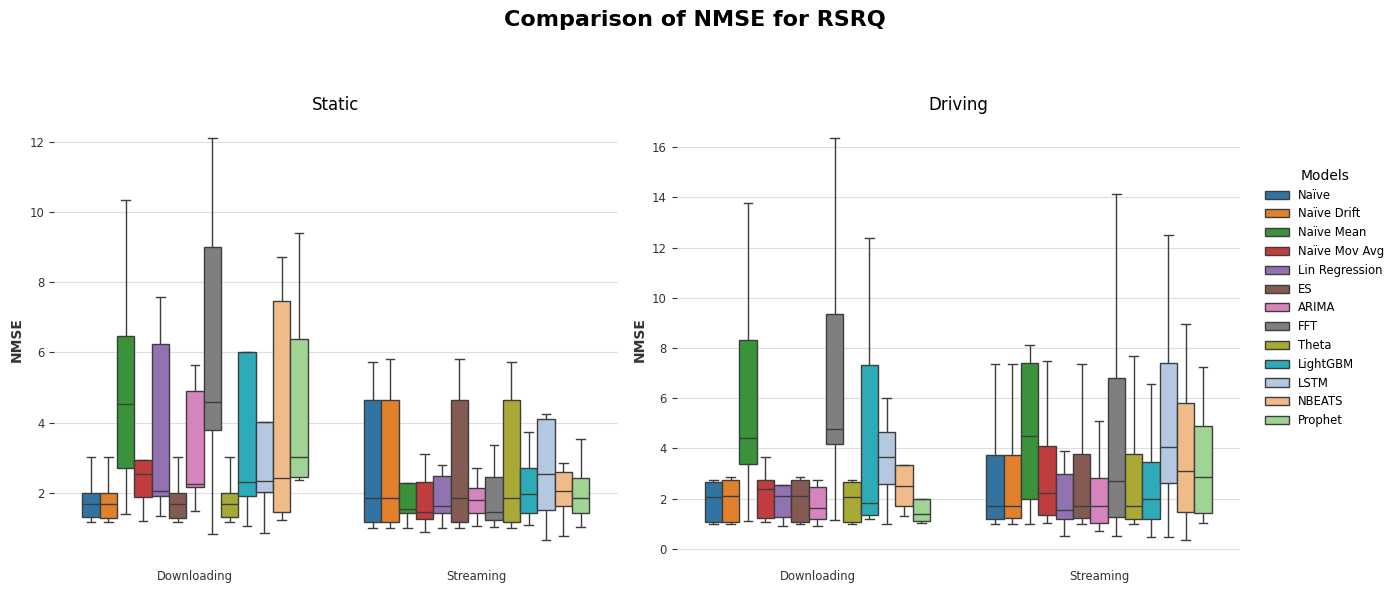

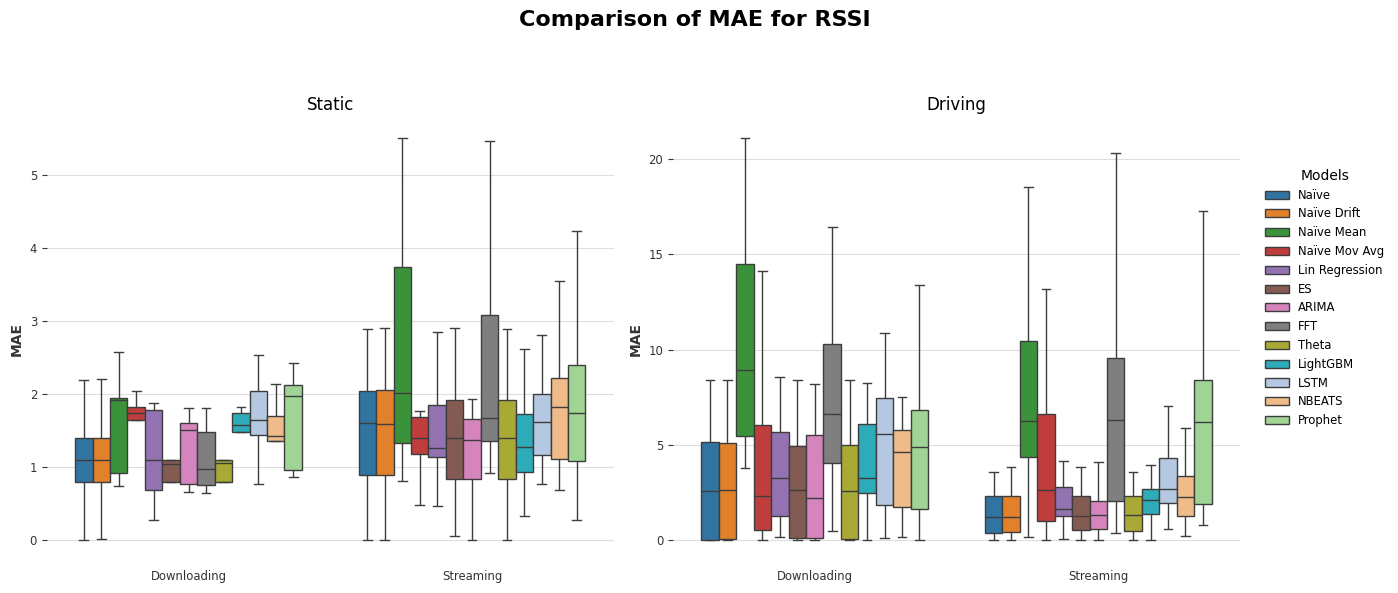

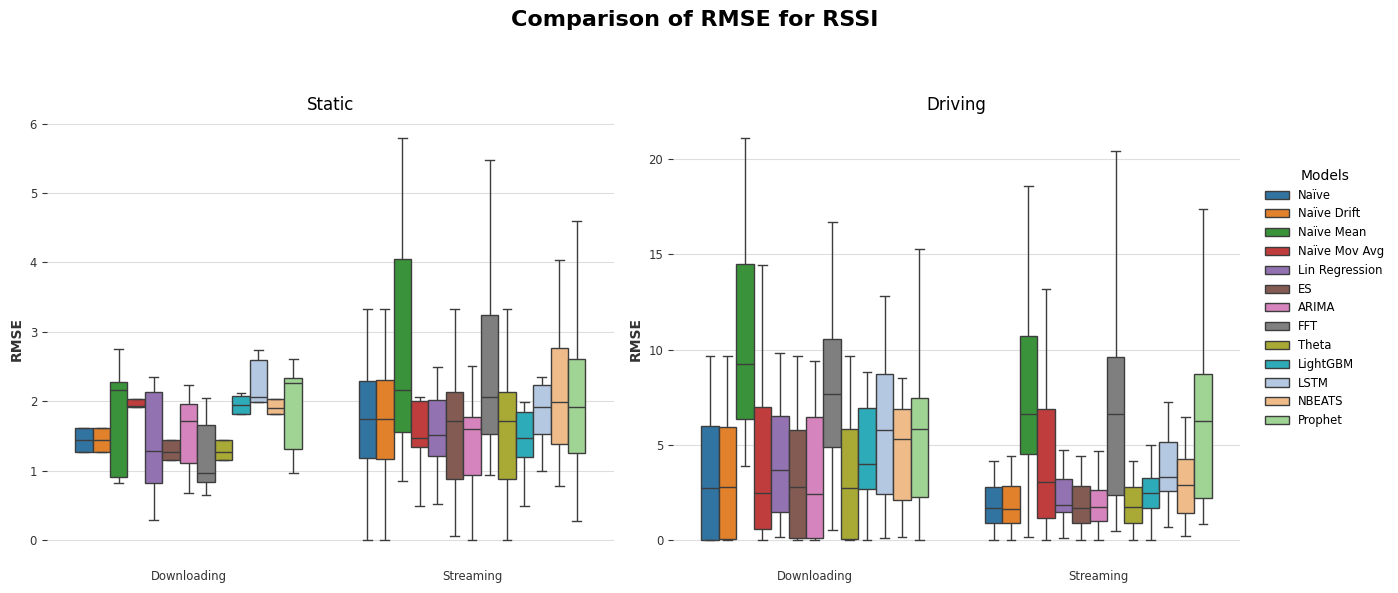

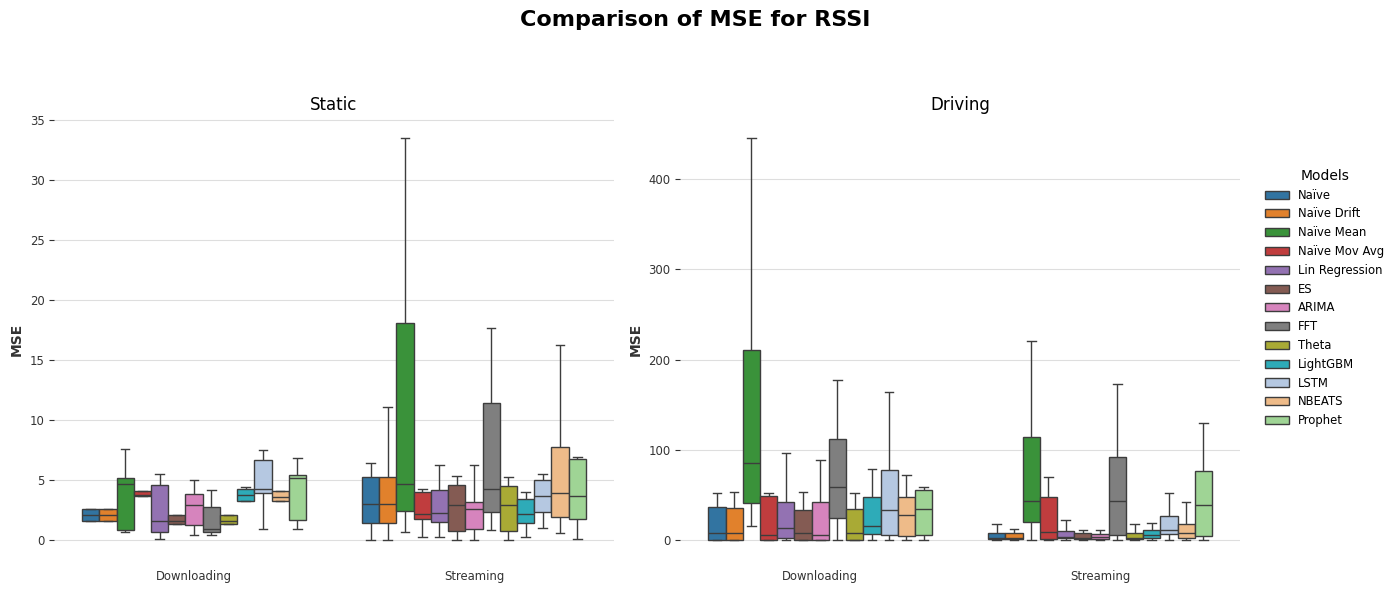

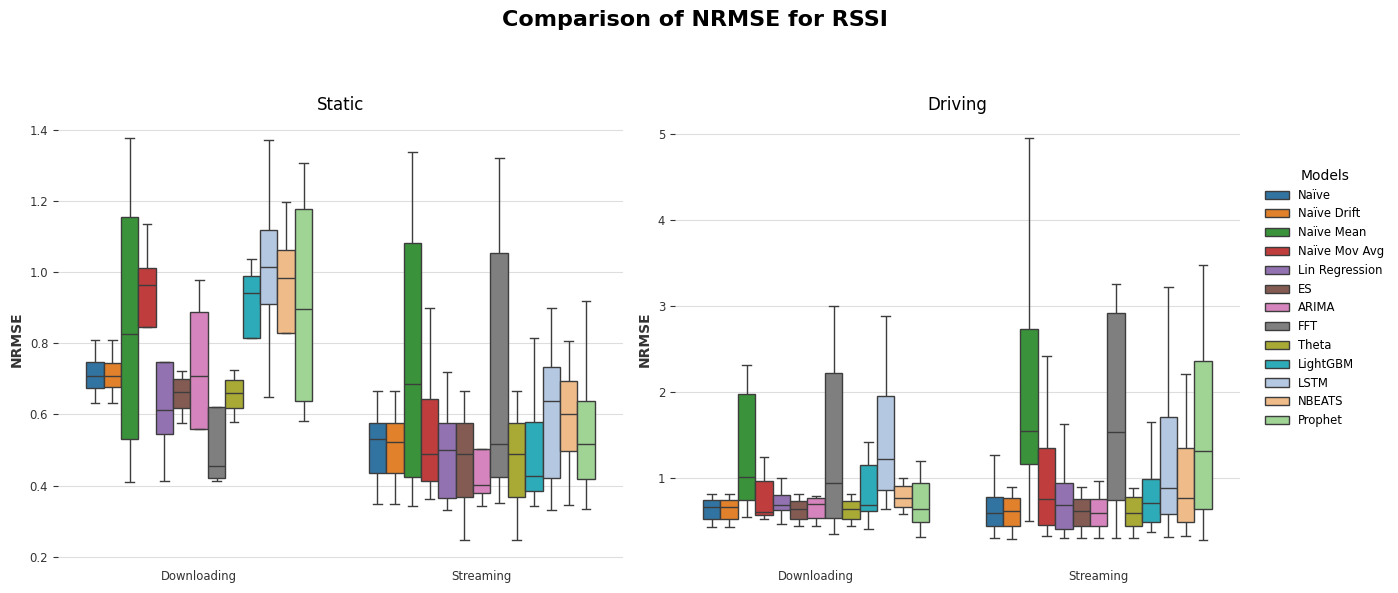

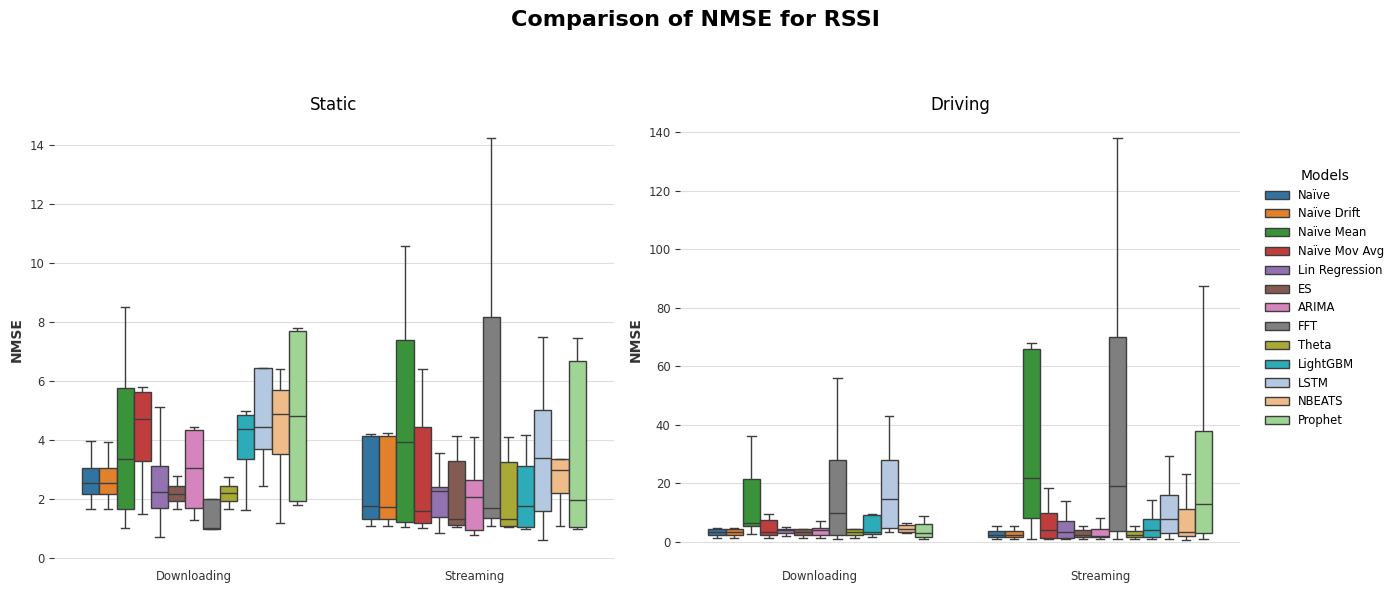

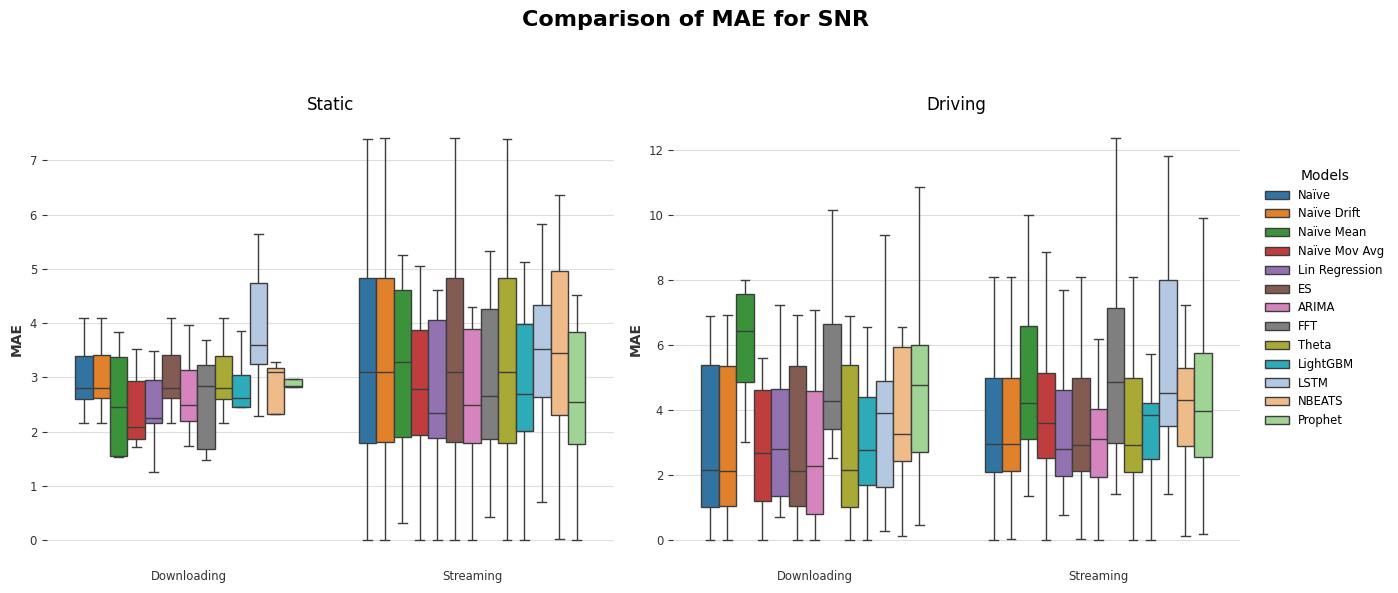

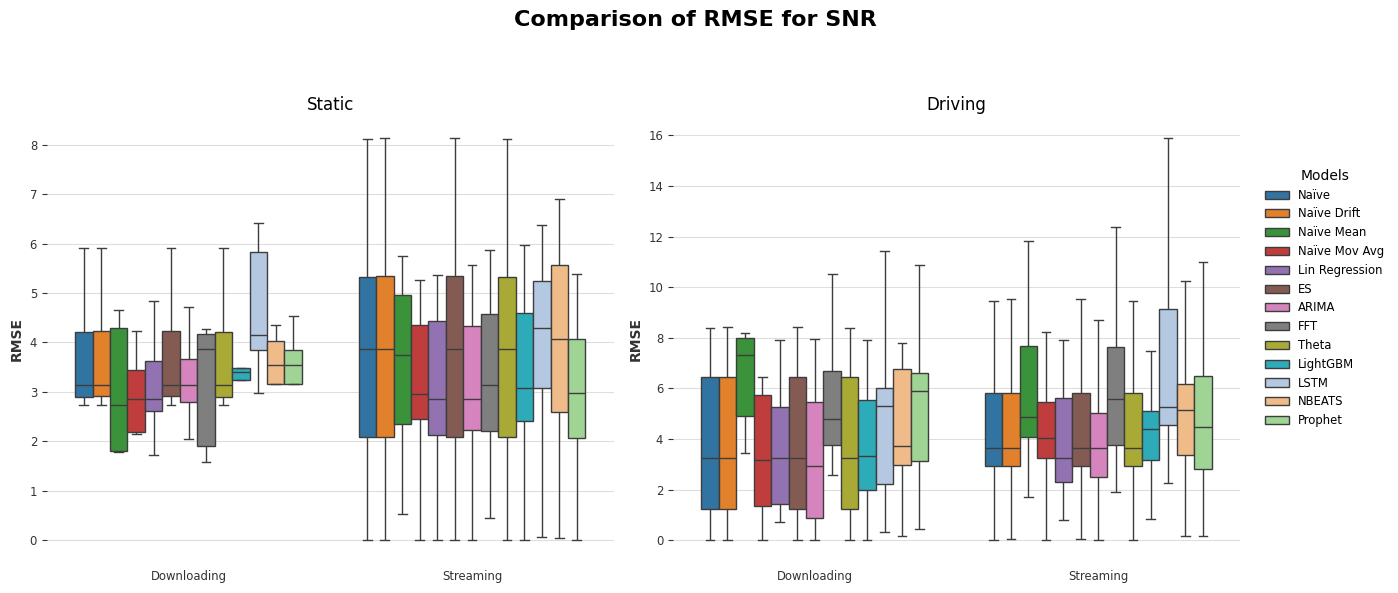

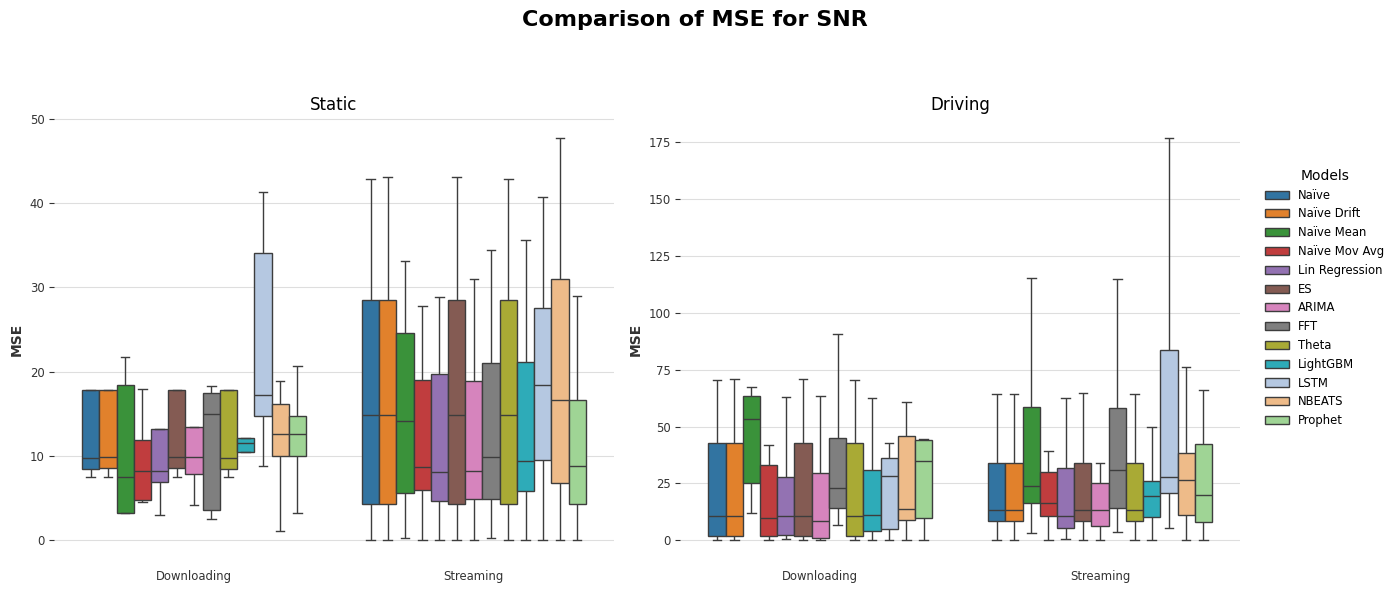

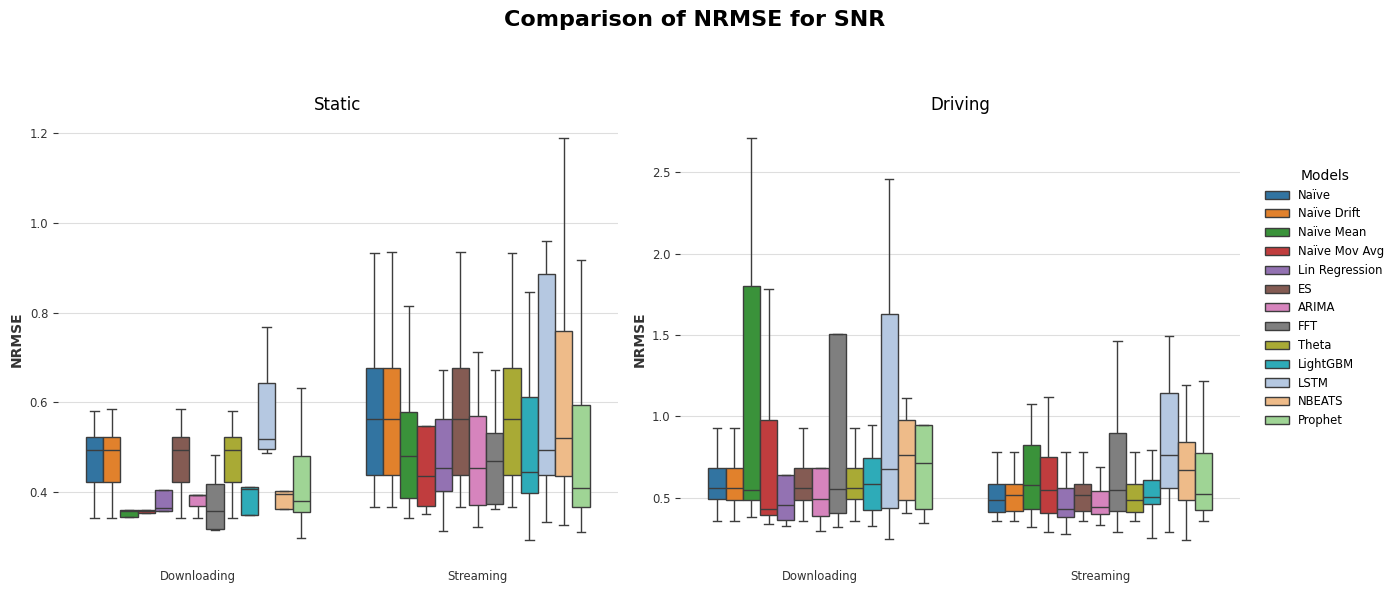

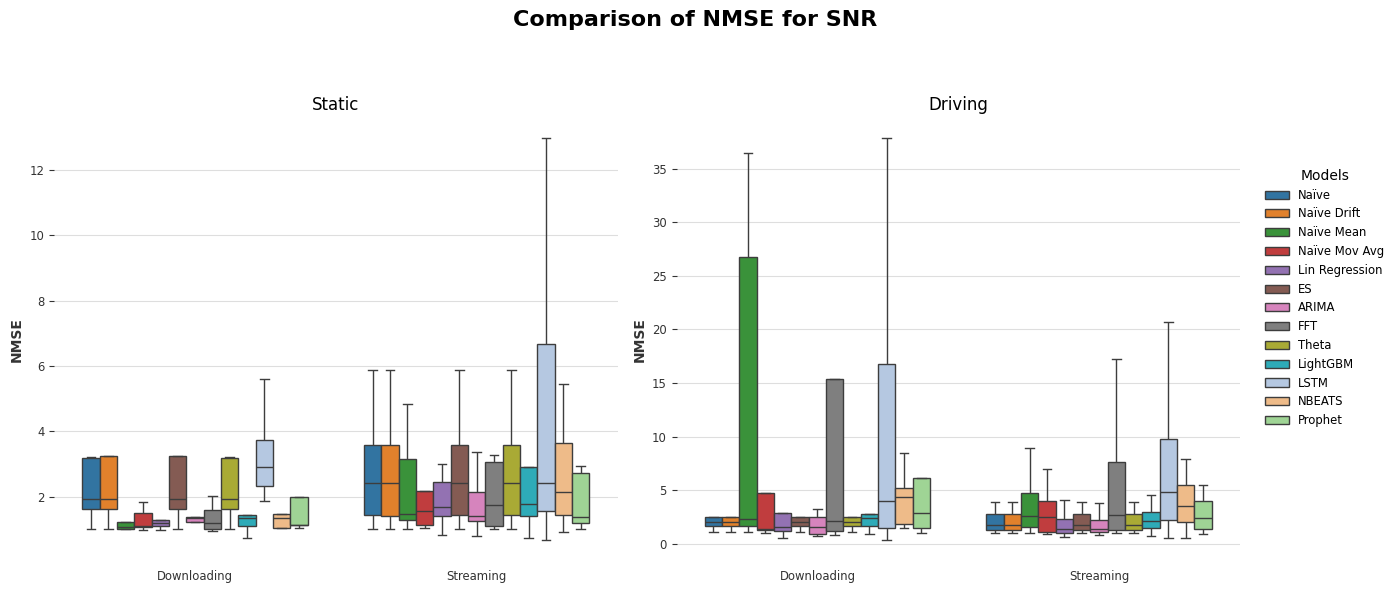

In [122]:
plot_boxplots_for_metrics_by_target(df_metrics, show_outliers=False)

In [ ]:
plot_boxplots_for_metrics_by_target(df_metrics, show_outliers=False)

In [ ]:
plot_boxplots_for_metrics_by_target(df_metrics, show_outliers=False)

# Lendo os resultados das métricas geradas por um modelo

In [16]:
def query_lowest_metric(df, metric):
    """
    Realiza uma query no DataFrame que retorna as linhas com o menor valor da métrica especificada para cada combinação de Model, target e Activity.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo as colunas 'Model', 'target', 'Activity' e as métricas.
    metric (str): Nome da métrica a ser avaliada ('MAE', 'RMSE' ou 'MSE').

    Retorna:
    pd.DataFrame: DataFrame contendo as linhas com o menor valor da métrica para cada grupo de Model, target e Activity.
    """

    # Verificar se a métrica especificada é válida
    if metric not in ["MAE", "RMSE", "MSE"]:
        raise ValueError(
            f"Métrica '{metric}' não é válida. Escolha entre 'MAE', 'RMSE' ou 'MSE'."
        )

    # Verificar se as colunas necessárias estão presentes no DataFrame
    required_columns = ["Model", "target", "Activity", metric]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Coluna {col} está ausente no DataFrame")

    # Obter os índices das linhas com o menor valor da métrica para cada combinação de Model, target e Activity
    idx = df.groupby(["Model", "target", "Activity"])[metric].idxmin()

    # Retornar as linhas correspondentes ao menor valor da métrica
    result = df.loc[idx]

    return result

In [17]:
lowest_mae = query_lowest_metric(df_metrics, "MAE")
lowest_rmse = query_lowest_metric(df_metrics, "RMSE")
lowest_mse = query_lowest_metric(df_metrics, "MSE")

In [ ]:
lowest_mae

## Um gráfico de comparação entre o resultado actual vs forescat em uma das sliding windows

In [19]:
def plot_actual_vs_preds(
    result_df: pd.DataFrame, model: str, target: str, activity: str
) -> None:
    """
    Plota as séries temporais reais versus as predições para uma combinação específica de Model, target e Activity.

    Args:
        result_df (pd.DataFrame): DataFrame contendo as colunas "Time_Index", "Actuals", "Preds", "Model", "target", "Activity".
        model (str): O modelo a ser filtrado.
        target (str): O alvo a ser filtrado.
        activity (str): A atividade a ser filtrada.
    """
    # Filtra o DataFrame com base nos parâmetros fornecidos
    filtered_df = result_df[
        (result_df["Model"] == model)
        & (result_df["target"] == target)
        & (result_df["Activity"] == activity)
    ]
    print(filtered_df[["MAE", "RMSE", "MSE"]])

    # Verifica se a filtragem resultou em algum dado
    if filtered_df.empty:
        raise ValueError("Nenhum dado encontrado para os parâmetros fornecidos.")

    # Obtém os dados da primeira linha do DataFrame filtrado
    time_index = pd.DatetimeIndex(filtered_df["Time_Index"].iloc[0])
    actuals = filtered_df["Actuals"].iloc[0]
    preds = filtered_df["Preds"].iloc[0]

    # Cria séries temporais para os dados reais e predições
    ts_actuals = TimeSeries.from_times_and_values(time_index, actuals)
    ts_preds = TimeSeries.from_times_and_values(time_index, preds)

    # Plota as séries temporais
    plt.figure(figsize=(14, 7))
    ts_actuals.plot(label="Reais", color="blue")
    ts_preds.plot(
        label="Predições", color="red", linestyle="--"
    )  # Linha tracejada para predições

    # Adiciona título, legendas e labels
    plt.title(
        f"Comparação entre Reais e Predições - Model: {model}, Target: {target}, Activity: {activity}"
    )
    plt.xlabel("Data/Hora")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Exemplo de uso
for model in lowest_mae["Model"].unique():
    plot_actual_vs_preds(
        lowest_rmse, model=model, target="RSRP", activity="static_down"
    )